# Lending Club Case study

## Data Understanding

### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Load Loan Dataset to pandas dataframe

In [30]:
loan_df=pd.read_csv('./loan/loan.csv')
loan_df.head()

C:\Users\saravanan.ponmudi\AppData\Local\Temp\ipykernel_22212\4217034196.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df=pd.read_csv('./loan/loan.csv')


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [31]:
loan_df.shape

(39717, 111)

### Describe dataframe

In [32]:
loan_df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

### Dataframe null count info

In [33]:
# Check for missing values in each column
missing_data = loan_df.isnull().sum()

# Display columns with missing values (if any)
missing_data = missing_data[missing_data > 0]
missing_data

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

### Data Quality

In [34]:
# Finding number of rows through sum function which have missing values

print('Number of rows having all values as null:')
print(loan_df.isnull().all(axis=1).sum())

# Output-
# There are 0 empty rows or rows having all the values as null in the entire dataset


# Finding the number of columns through sum function which have missing values

print('Number of columns having all values as null:')
print(loan_df.isnull().all(axis=0).sum())

# Output-
# There are 54 empty columns or columns having all the values as null in the entire dataset

Number of rows having all values as null:
0
Number of columns having all values as null:
54


In [35]:
#Find the percentage of missing values in each column of the dataset 'loan_df'.
missing = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.59
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [36]:
columns_with_missing_values = list(missing[missing >= 50].index)
len(columns_with_missing_values)

57

There were 57 columns with more than 50% values as missing. Removing such columns as these columns clearly add noise and wont help in analysis.

In [37]:
loan_df.drop(columns_with_missing_values,axis=1,inplace=True)
loan_df.shape

(39717, 54)

Let's remove the desc column because purpose and title column will do same for the data.

In [38]:
loan_df.drop('desc',axis=1,inplace=True)

#### Summary of Data Quality step:

In [39]:
print("unique emp_title : %d"  % len(loan_df.emp_title.unique()))
print("unique emp_length : %d"  % len(loan_df.emp_length.unique()))
print("unique title : %d"  % len(loan_df.title.unique()))
print("unique revol_util : %d"  % len(loan_df.revol_util.unique()))
print("unique title : %d"  % len(loan_df.title.unique()))
print("unique last_pymnt_d : %d"  % len(loan_df.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan_df.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan_df.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan_df.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan_df.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan_df.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique title : 19616
unique revol_util : 1090
unique title : 19616
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


## Data Cleaning and Manipulation

Columns <b>emp_length, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies</b> and <b>tax_liens</b> are clearly Categorical with values belonging to a range.

In [40]:
loan_df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [41]:
loan_df.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [42]:
loan_df.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [43]:
loan_df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [44]:
loan_df.tax_liens.unique()

array([ 0., nan])

The columns <b>collections_12_mths_ex_med, chargeoff_within_12_mths </b>and <b>tax_liens</b> has either value of 0 or nan(no entry/blank). The range of values that these categorical columns can take is not of any significant impact to the analysis.
We can decide to drop these columns for analysis.

In [45]:
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan_df.drop(drop_columnlist,axis=1,inplace=True)

In [46]:
loan_df.shape

(39717, 50)

Next, lets look at the pub_rec_bankruptcies categorical column with 1.76% missing data. It tells us about the past number of public record bankruptcies of that borrower.

In [47]:
loan_df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

pub_rec_bankruptcies can be seen to have taking values like [0,1,2]. Almost 35000 records with 0 record of bankrupcies, 1500 records having one bankrupcies case and 7 records with two bankrupcies case. While we could have taken the mode representation of the data which is 0 bankrupcies to impute the missing values. But, we decide to remove the rows instead so that we ensure we dont add any bais to the data.

In [48]:
loan_df=loan_df[~loan_df.pub_rec_bankruptcies.isnull()]

In [49]:
missing = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2) 
missing[missing != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Next, the columns emp_title, emp_length have 6.19% and 2.71% missing value. These columns have information about the customer/borrower like their job title and their employment length in years. Let's remove the rows with nan/blank values for these varaibles.

In [50]:
loan_df=loan_df[~loan_df.emp_title.isnull()]
loan_df=loan_df[~loan_df.emp_length.isnull()]

In [51]:
loan_df.shape

(36548, 50)

In [52]:
missing = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2) 
missing[missing != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Now, we are left with 3 columns title, revol_util and last_pymnt_d which account for a very small % of missing value of 0.02%, 0.13% and 0.18% respectively. title gives the title of the loan specified by the borrower in the application. revol_util gives the revolving line utelization and last_pymnt_d gives the month in which last payment was received.

Let's again remove the rows with null value for these variables.

In [53]:
loan_df=loan_df[~loan_df.title.isnull()]
loan_df=loan_df[~loan_df.revol_util.isnull()]
loan_df=loan_df[~loan_df.last_pymnt_d.isnull()]

In [54]:
loan_df.shape

(36433, 50)

In [55]:
missing = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2) 
missing[missing != 0]

Series([], dtype: float64)

Now, we have now reduced the data set to have 36433 loan records and 50 attributes with no missing values. Let's write it into another file and use that file for further analysis.

In [55]:
loan_df.to_csv('clean_loan.csv', encoding='utf-8', index=False)

Further shortlist and narrow down the columns for analysis

In [57]:
clean_loan = loan_df[:]

In [58]:
clean_loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

A data dictionary file is also been provided along with the loan data. This file gives a brief describtion about all the columns of the loan transaction file. Let's use this file to get a better understanding of the 50 columns we are left with. This will help to further narrow down on the columns.

There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

These columns are:
<ol>
<li><b>id</b> : is a random number given to the loan, does not contribute to analysis
<li><b>member_id </b>: is a random number given to the member, does not contribute to analysis
<li><b>pymnt_plan </b>: value for entire dataset is 'n', therefore can be removed.
<li><b>url </b>: is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
<li><b>zip_code </b>: first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis
<li><b>initial_list_status </b>: value for entire dataset is 'f' out of the possible values, therefore can be removed.
<li><b>policy_code </b>: value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
<li><b>application_type </b>: value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
<li><b>acc_now_delinq</b> : value for entire dataset is '0', therefore can be removed.
<li><b>delinq_amnt </b>: value for entire dataset is '0', therefore can be removed.
<li><b>funded_amnt </b>: value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.
<li><b>funded_amnt_inv </b>: value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.
</ol>
<br>
Dropping the above columns from the clean_loan dataframe.

In [59]:
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
clean_loan= clean_loan.drop(columns_tobe_dropped,axis=1)

In [60]:
clean_loan.shape

(36433, 38)

Columns for analysis reduced to 38 columns.

### Standardise values

Next, let's standardize the precision of the data. There are certain columns with need rounding of the values up until two decimal places.

These columns are:
<ol>
<li><b>total_pymnt</b>
<li><b>total_rec_late_fee</b>
<li><b>collection_recovery_fee</b>
</ol>

In [61]:
clean_loan.total_pymnt.value_counts().tail()

total_pymnt
5661.170000     1
40297.372600    1
9536.544293     1
4577.397548     1
3579.662273     1
Name: count, dtype: int64

In [62]:
clean_loan.total_rec_late_fee.value_counts().tail()

total_rec_late_fee
30.260000    1
14.946207    1
25.530000    1
14.987132    1
52.262227    1
Name: count, dtype: int64

In [63]:
clean_loan.collection_recovery_fee.value_counts().tail()

collection_recovery_fee
2.9400      1
9.5864      1
14.5170     1
15.3684     1
668.3600    1
Name: count, dtype: int64

In [64]:
clean_loan.total_pymnt= round(clean_loan.total_pymnt,2)
clean_loan.total_rec_late_fee= round(clean_loan.total_rec_late_fee,2)
clean_loan.collection_recovery_fee= round(clean_loan.collection_recovery_fee,2)

### Fix invalid values

Next, there are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. Doing so will help in further using these column values to its best for analysis.

These columns are:
<ol>
<li>issue_d
<li>earliest_cr_line
<li>last_pymnt_d
<li>last_credit_pull_d
<ol>

In [65]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
clean_loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


Converting the dtype of these columns to datetime

In [66]:
clean_loan.issue_d = pd.to_datetime(clean_loan.issue_d, format='%b-%y')
clean_loan.earliest_cr_line = pd.to_datetime(clean_loan.earliest_cr_line, format='%b-%y')
clean_loan.last_pymnt_d = pd.to_datetime(clean_loan.last_pymnt_d, format='%b-%y')
clean_loan.last_credit_pull_d = pd.to_datetime(clean_loan.last_credit_pull_d, format='%b-%y')

In [67]:
clean_loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


Dropping Duplicated rows if any,

In [68]:
clean_loan=clean_loan.drop_duplicates()
clean_loan.shape

(36433, 38)

### Filter data

Next, there are few columns expressing % like int_rate and revol_util. These has values like '15.27%' and '9.40%'. Further these columns has dtype as 'object'. Let's convert these columns to have just the value withoout '%' and typecast it to float.

In [69]:
clean_loan.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [70]:
clean_loan.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [71]:
clean_loan['int_rate'] = clean_loan['int_rate'].str.strip('%').astype('float')
clean_loan['revol_util'] = clean_loan['revol_util'].str.strip('%').astype('float')

In [72]:
clean_loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36433 non-null  float64
 1   revol_util  36433 non-null  float64
dtypes: float64(2)
memory usage: 853.9 KB


Let us now take a look at the <b>emp_length</b> column.

In [73]:
clean_loan.emp_length.value_counts()

emp_length
10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: count, dtype: int64

According to the data_dictionary file description for this field, emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. Let's convert the column to have values between 0 and 10.

In [74]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [75]:
clean_loan = clean_loan.replace({"emp_length": emp_length_dict })

In [76]:
clean_loan.emp_length.value_counts()

emp_length
10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: count, dtype: int64

The column term: The number of payments on the loan. Values are in months and can be either 36 or 60.
removing the months string from within the column term.

In [77]:
clean_loan.term.value_counts()

term
36 months    26377
60 months    10056
Name: count, dtype: int64

In [78]:
clean_loan['term'] = clean_loan.term.apply(lambda x: x.split()[0])
clean_loan.term.value_counts()

term
36    26377
60    10056
Name: count, dtype: int64

<b>earliest_cr_line</b> : The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_year

Lets split the available date into month and year column.

In [79]:
clean_loan['earliest_cr_line_month'] = clean_loan['earliest_cr_line'].dt.month
clean_loan['earliest_cr_line_year'] = clean_loan['earliest_cr_line'].dt.year
len(clean_loan[clean_loan['earliest_cr_line_year'] > 2011 ])

50

We see that there are 50 records with the earliest credit line date greater than 2011(which is the max range of the data we have). Lets see the data to understand why.

In [80]:
clean_loan[clean_loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054])

This seems to be a result of y2k like error. Year stored in two digits being interpreted as year in 21st century. Let's fix the entries.

In [81]:
clean_loan.loc[clean_loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = clean_loan['earliest_cr_line_year'] - 100
clean_loan.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

<b>issue_d</b>: The month which the loan was funded .Lets split the available date into month and year column.

In [82]:
clean_loan['issue_d_month'] = clean_loan['issue_d'].dt.month
clean_loan['issue_d_year'] = clean_loan['issue_d'].dt.year

Writing the ready to analyse data to a csv. We will use this new csv for ease in further analysis.

In [83]:
clean_loan.to_csv('final_loan.csv', encoding='utf-8', index=False)

In [90]:
final_loan = pd.read_csv('final_loan.csv')  

## Analysis

Load the final data for further anaysis.

In [4]:
final_loan = clean_loan[:]
final_loan.shape

(36433, 42)

In [91]:
final_loan.loan_status.value_counts()

loan_status
Fully Paid     30424
Charged Off     4943
Current         1066
Name: count, dtype: int64

Since we need to understand differences in the features between loans that have been fully paid or charged off. Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."

In [92]:
final_loan = final_loan[final_loan['loan_status'].isin(['Fully Paid','Charged Off'])]
final_loan.shape

(35367, 42)

### Univariate and Segmented Univariate Analysis

Define a few methods to aid in plotting graphs

In [93]:
# This function shows the labels and ticks and annotates with the value or percentatges
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [94]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 

def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [95]:
# This method plots a distribution of target column, and its boxplot against loan_status column

def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax =  sns.histplot(
            dataframe[col], kde=True,
            stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4),
           )
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe,palette='pastel')
    plt.show()

In [96]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest

def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (final_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    values = (final_loan.loc[final_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

In [97]:
(final_loan['grade'].value_counts(normalize=True)*100).sort_index()

grade
A    25.843300
B    30.305087
C    20.304238
D    13.184607
E     7.015014
F     2.550400
G     0.797353
Name: proportion, dtype: float64

<b>loan_status</b> : Current status of the loan

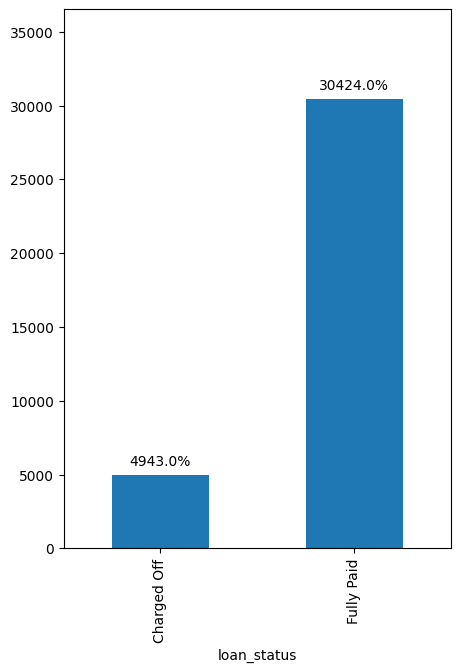

In [98]:
plt.figure(figsize=(5,7))
ax = final_loan.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

In [99]:
print("%.2f" % (final_loan.loc[final_loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(final_loan)))

13.98


Approximately 14% of loans in the dataset are defaulted. Any variable that increases percentage of default to higher than 16.5% should be considered a business risk. (16.5 is 18% higher than 13.97 - a large enough increase)

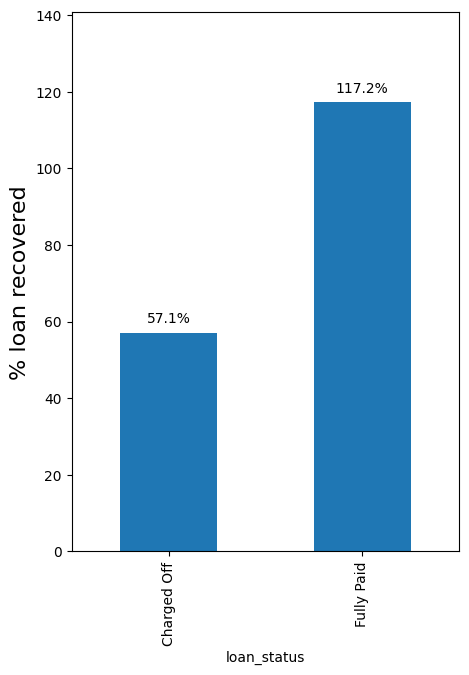

In [100]:
plt.figure(figsize=(5,7))
ax = (final_loan.groupby('loan_status').total_pymnt.sum() * 100 / final_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

<b>Lending Club only recovers 57% of the loan amount when loans are defaulted. On fully paid up loans, the company makes 17% profit.

Let us see graphs of some other important variables

<b>loan_amnt </b>: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

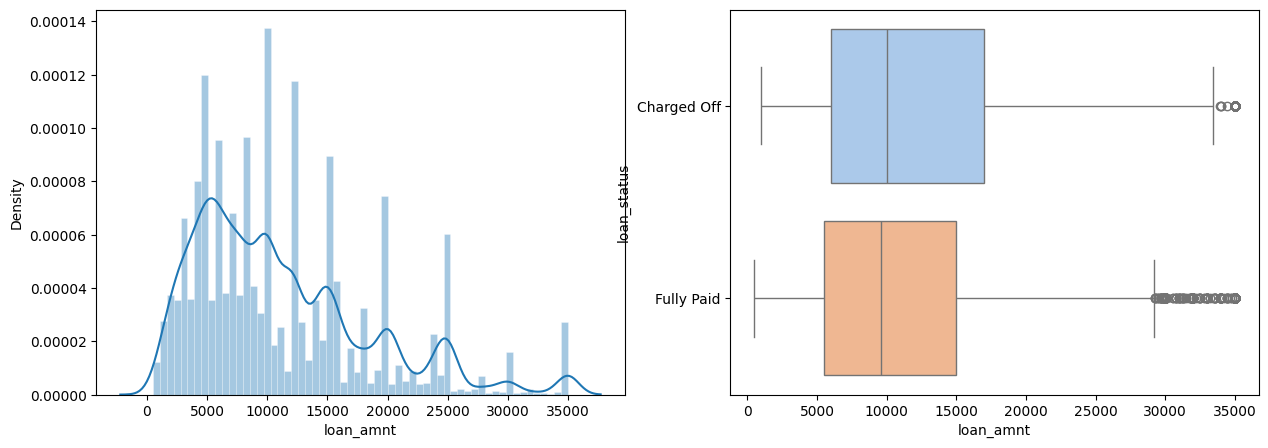

In [101]:
plot_distribution(final_loan, 'loan_amnt')

In [102]:
final_loan.groupby('loan_status')['loan_amnt'].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   4943.0  12286.147077  8064.255961  1000.0  6000.0  10000.0   
Fully Paid   30424.0  10945.731166  7181.867451   500.0  5500.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  17000.0  35000.0  
Fully Paid   15000.0  35000.0

<b>Observation:</b>
<ul>
<li>Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
<li>Funding amounts see a spike around each 5000 boundary. We will use 5000 as bucket size for later analysis.
<li>Charged off loans are shifted towards higher average loan amount request.
</ul>

In [103]:
#Create Derived categorical variable
final_loan['loan_amnt_bin'] = pd.cut(final_loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

<Axes: xlabel='loan_amnt_bin', ylabel='% of loans Charged Off'>

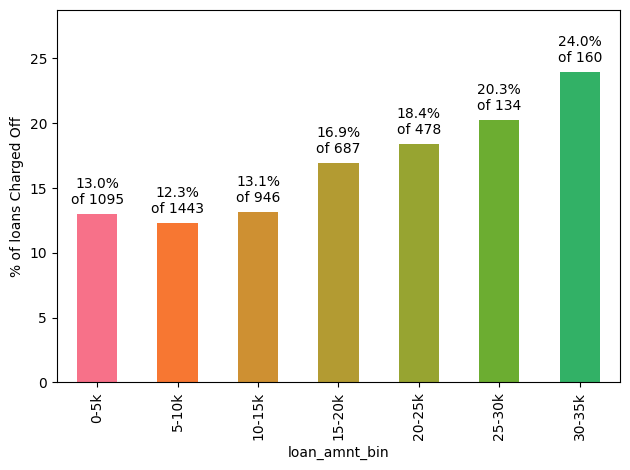

In [104]:
plotLoanStatus(final_loan, 'loan_amnt_bin')

<b>Observation:</b>
<ul>
<li>The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default.
</ul>

### Other categorical variables distribution

Let's see how some other categorical variables of interest are distributed within the dataset

In [105]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('pastel', 16))
        showLabels(ax)

    plt.tight_layout()

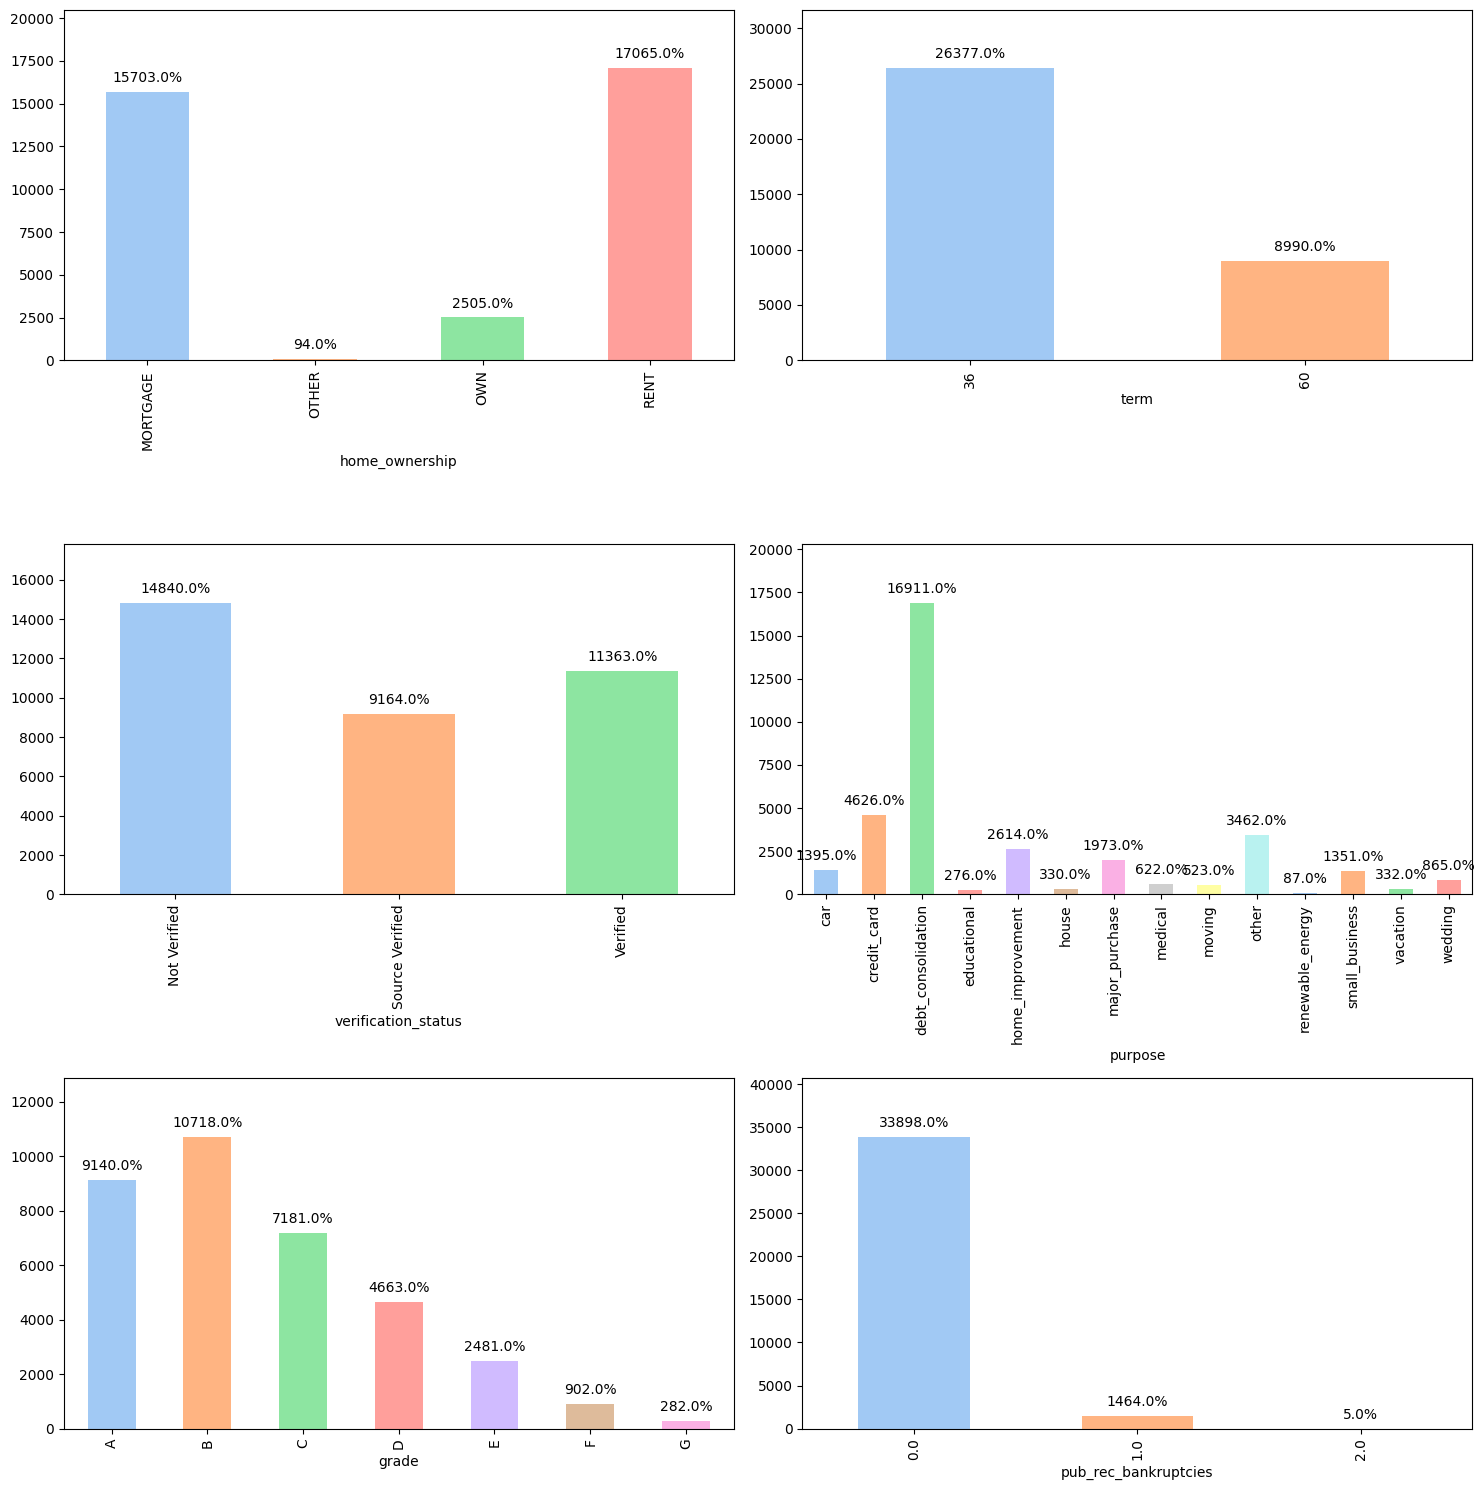

In [106]:
plt.figure(figsize=(15,15))

categoricalBarPlots(final_loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

<b>term </b>: The number of payments on the loan. Values are in months and can be either 36 or 60.

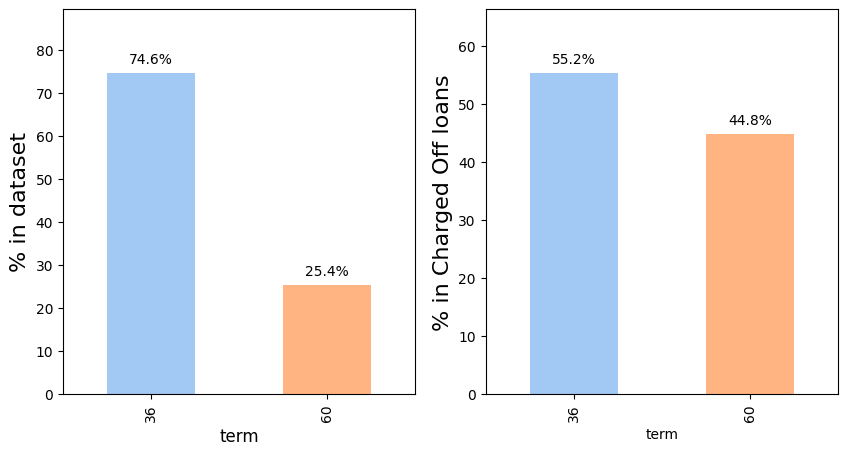

In [107]:
plt.figure(figsize=(10,5))
plot_percentages(final_loan, 'term')

<b>Observation :</b>
<ul>
<li>Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.
<li>Among Charged Off loans, percentage of term 60 months rises to 45%. The higher term loans have a higher chance of default.
</ul>

<b>purpose :</b> A category provided by the borrower for the loan request.

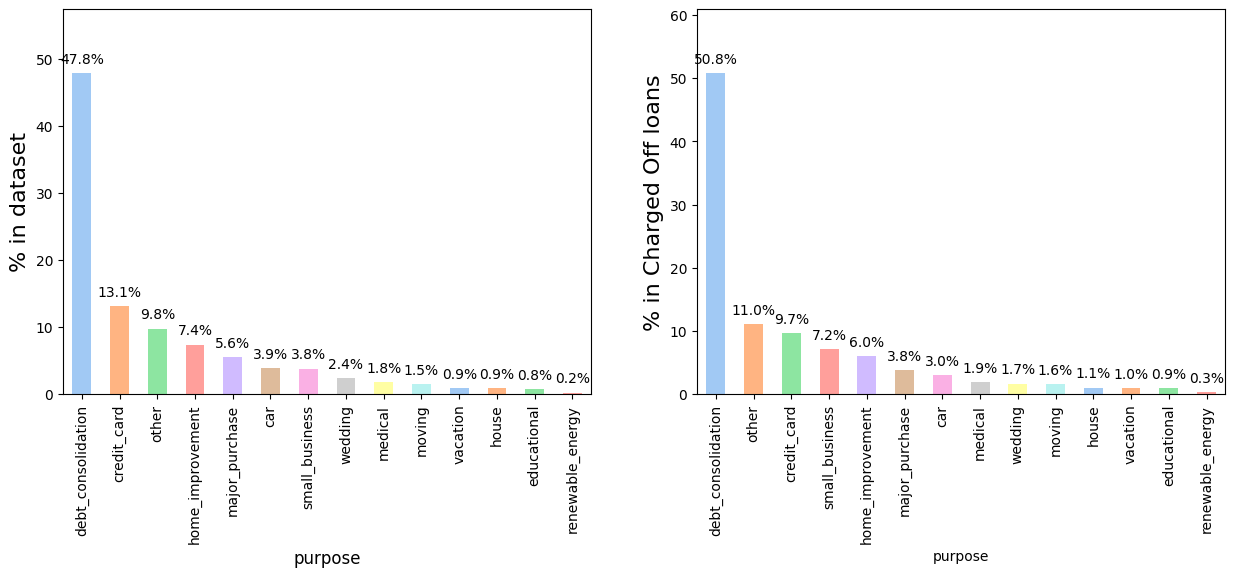

In [108]:
plt.figure(figsize=(15,5))
plot_percentages(final_loan, 'purpose')

<b>Observation :</b>

<li>The category small_business percentage doubles from 3.8 to 7.2 for Charged Off loans. Let's see how the categories of this variable behave.

<Axes: xlabel='purpose', ylabel='% of loans Charged Off'>

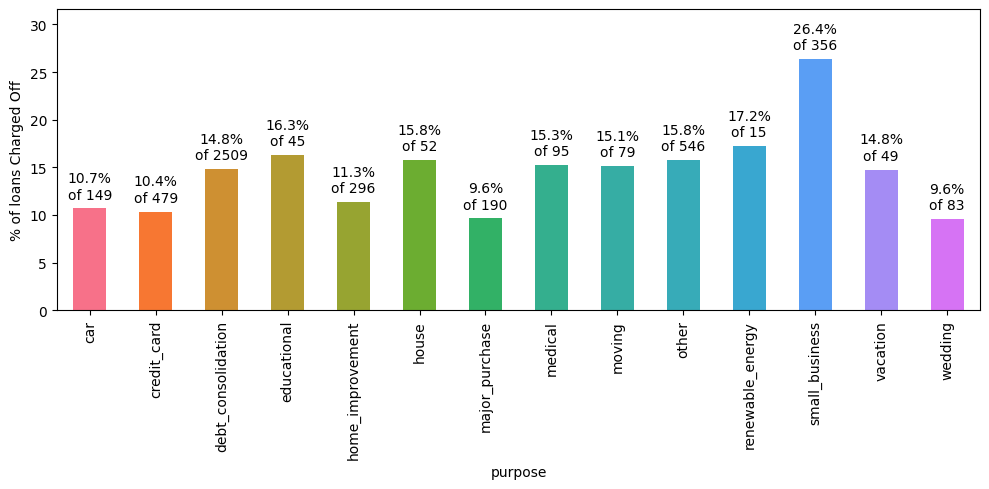

In [110]:
plt.figure(figsize=(10, 5))
plotLoanStatus(final_loan, 'purpose')

<b>Observation :</b>

<li>26% of loans for small business are Charged Off. Making them the most risky purpose.
<li>Approximately ~49% of the loans are issued for the purpose of dept consolidation.
<li>17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance.

<b>pub_rec_bankruptcy :</b> Number of public record bankruptcies

<Axes: xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

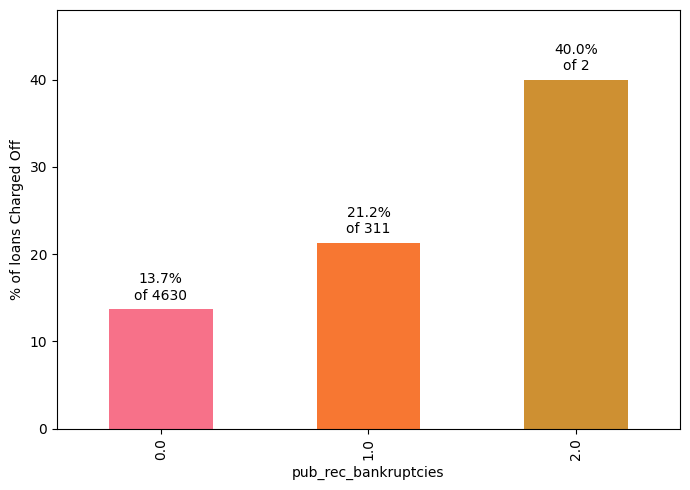

In [111]:
plt.figure(figsize=(7,5))
plotLoanStatus(final_loan, 'pub_rec_bankruptcies')

<b>Observation :</b>

<li>The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.

<b>int_rate :</b> Interest Rate on the loan.

In [112]:
final_loan.int_rate.describe()

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

<Figure size 1500x500 with 0 Axes>

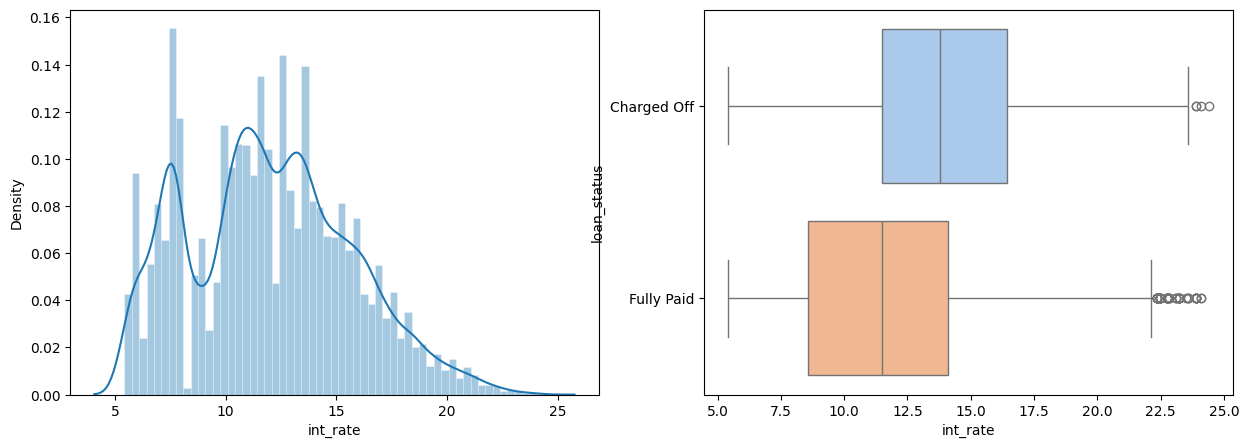

In [113]:
plt.figure(figsize=(15,5))
plot_distribution(final_loan, 'int_rate')

In [114]:
final_loan.groupby('loan_status')['int_rate'].describe()

count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   4943.0  13.929828  3.647619  5.42  11.49  13.79  16.45  24.40
Fully Paid   30424.0  11.667243  3.613734  5.42   8.59  11.49  14.09  24.11

<b>Observation :</b>

<li>Overall, the intrest rate varies from <b>5.42% </b>to <b>24.4% </b>with average intrest rate of <b>11.8%</b>.
<li>The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases. Let's analyze this more

In [115]:
final_loan['interest_rate_buckets'] = round(final_loan['int_rate'])

<Axes: xlabel='interest_rate_buckets', ylabel='% of loans Charged Off'>

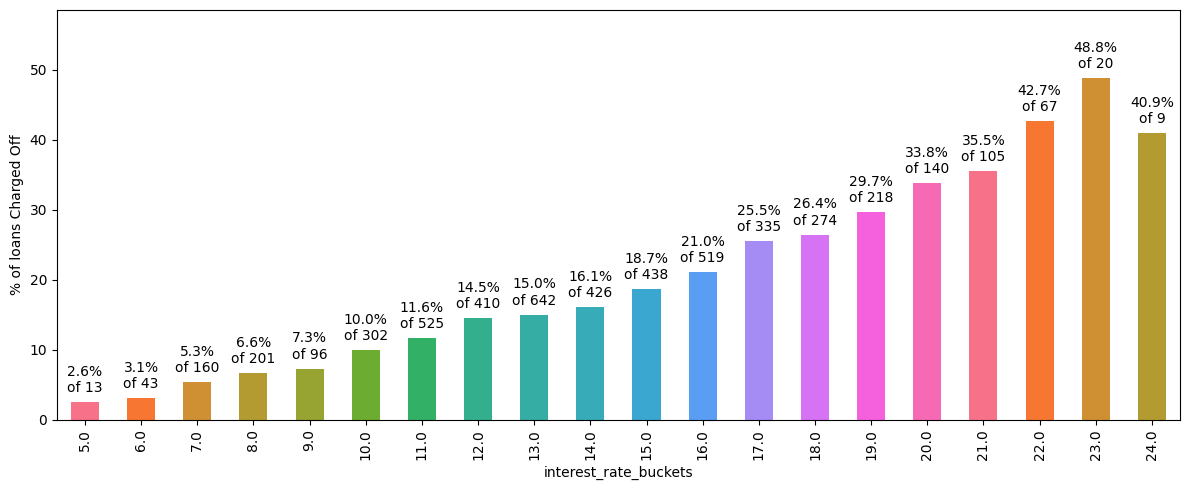

In [116]:
plt.figure(figsize=(12,5))
plotLoanStatus(final_loan, 'interest_rate_buckets')

<b>installment :</b> The monthly payment owed by the borrower if the loan originates.

In [117]:
final_loan.installment.describe()

count    35367.000000
mean       324.043982
std        207.149088
min         16.080000
25%        167.840000
50%        280.620000
75%        426.640000
max       1305.190000
Name: installment, dtype: float64

<Figure size 1500x500 with 0 Axes>

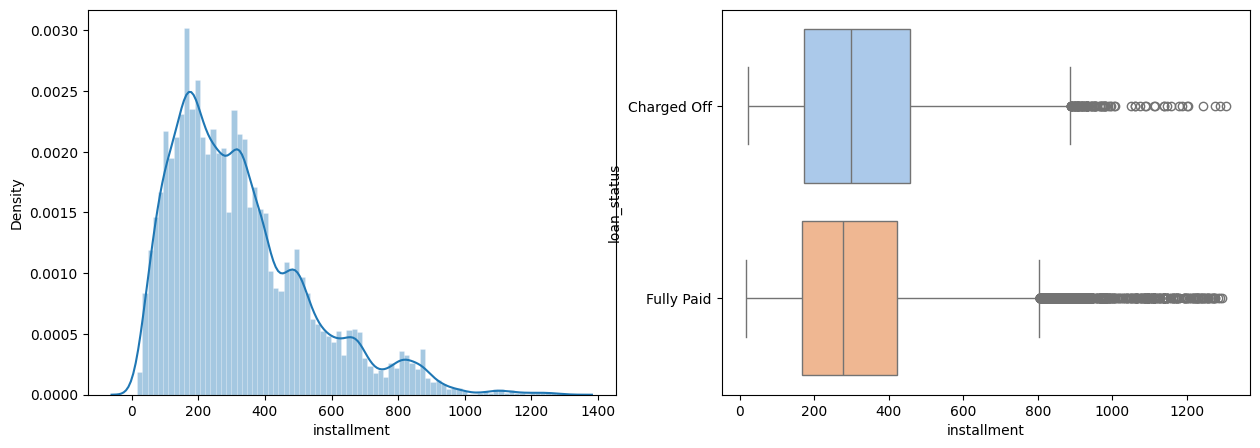

In [118]:
plt.figure(figsize=(15,5))
plot_distribution(final_loan, 'installment')

In [119]:
final_loan.groupby('loan_status')['installment'].describe()

count        mean         std    min       25%     50%  \
loan_status                                                             
Charged Off   4943.0  338.848452  214.527655  22.79  172.4350  298.33   
Fully Paid   30424.0  321.638693  205.828423  16.08  167.2975  278.24   

                  75%      max  
loan_status                     
Charged Off  458.3150  1305.19  
Fully Paid   422.3075  1295.21

<b>Observation :</b>

<li>installment amount varies largely between 170.08 to 420 with median of 280
<li>loans Charged Off have high installment on average

<b>grade and sub_grade :</b> LC assigned loan grade and subgrade.

In [120]:
final_loan.grade.value_counts()

grade
B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: count, dtype: int64

Let's find the relative frequencies of the unique sub_grade.

In [121]:
final_loan.sub_grade.value_counts(normalize=True).head()

sub_grade
A4    0.075268
B3    0.073204
A5    0.070320
B5    0.069104
B4    0.063534
Name: proportion, dtype: float64

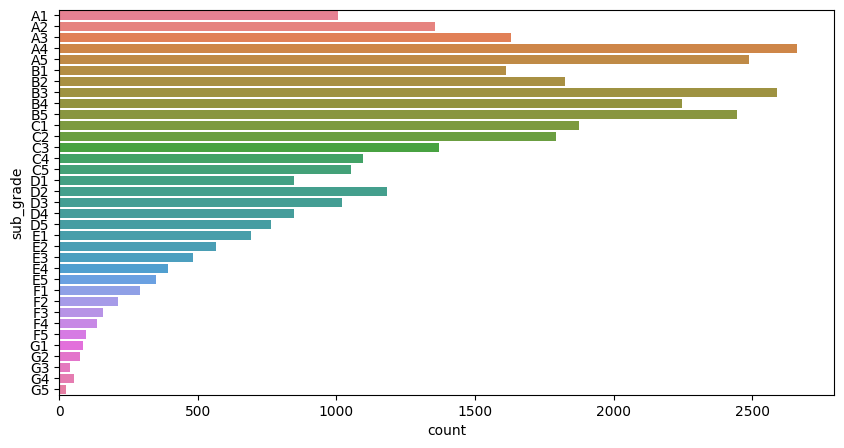

In [122]:
plt.figure(figsize=(10,5))
sns.countplot(final_loan['sub_grade'], order=sorted(final_loan.sub_grade.unique()),palette='husl')
plt.show()

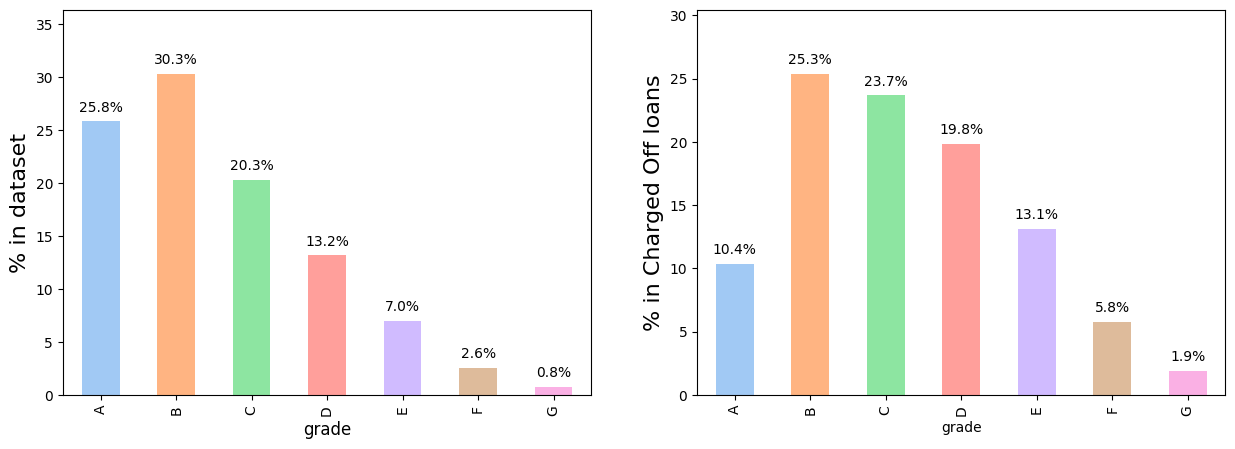

In [123]:
plt.figure(figsize=(15,5))
plot_percentages(final_loan, 'grade', True)

<b>Observation :</b>

<li>Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.
<li>Grade D, E, F, G loans are less safe. We should plot grade by percentage Charged Off by category
<li>Lending Clubs grading system is working well.

<Axes: xlabel='grade', ylabel='% of loans Charged Off'>

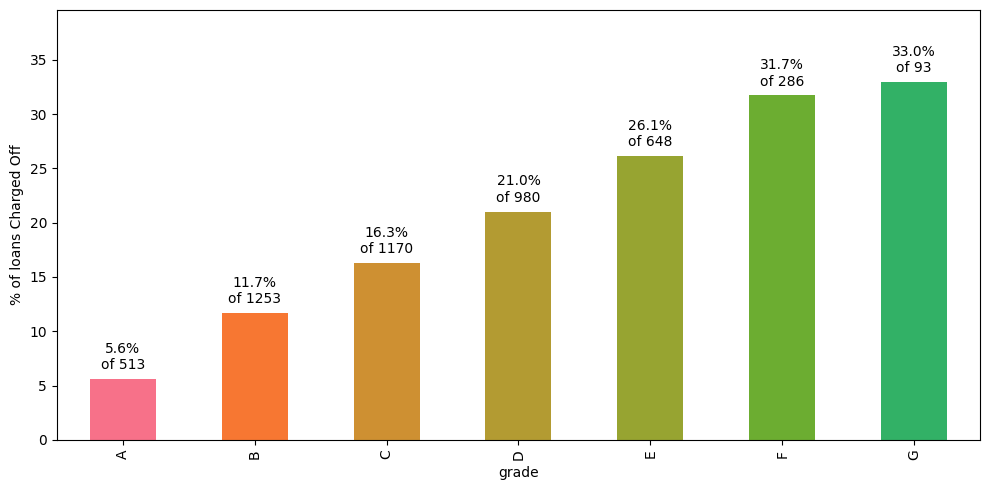

In [124]:
plt.figure(figsize=(10,5))
plotLoanStatus(final_loan, 'grade')

<b>Observation :</b>

<li>Nearly 30% of all loans in Grades F and G see a default.
<li>Grade E onwards are risky, and less numerous. Lending Club should either refuse loans or charge high interest rates.

<Axes: title={'center': 'int_rate'}, xlabel='grade'>

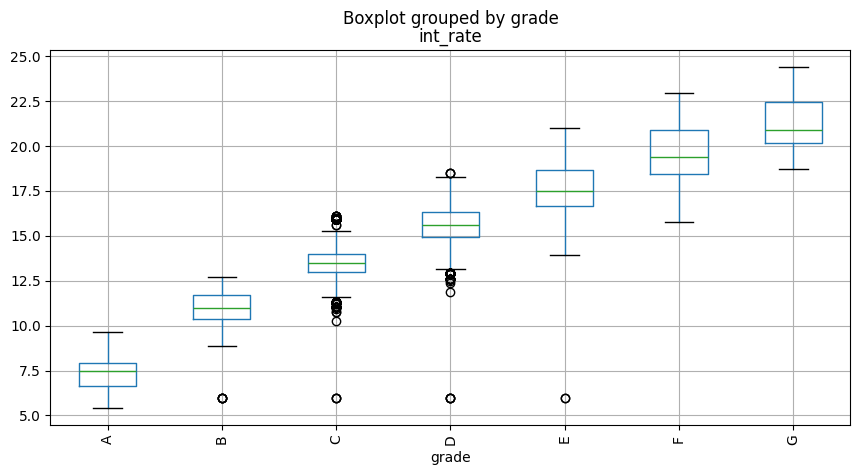

In [125]:
fig, ax = plt.subplots(figsize=(10,5))
final_loan.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

<b>Observation :</b>

<li>Here we see that Lending Club is, correctly, charging higher interest rates for lower grade loans.

<b>emp_title </b>: The job title supplied by the Borrower when applying for the loan. Employer Title replaces Employer Name for all loans listed after 9/23/2013

In [126]:
# top 10 employee
top_10_emp_title = final_loan.emp_title.value_counts(normalize=False).head(10)

C:\Users\saravanan.ponmudi\AppData\Local\Temp\ipykernel_27360\1197845952.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=45)


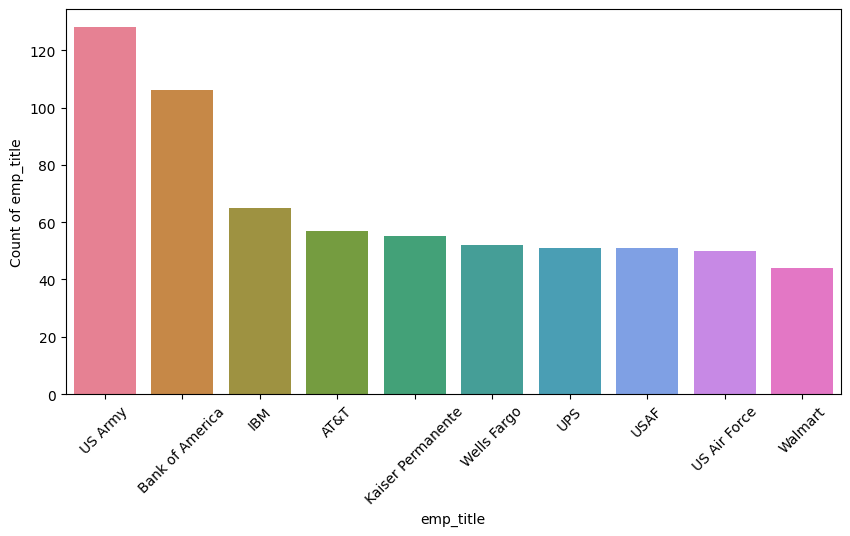

In [127]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=top_10_emp_title.index, y=top_10_emp_title.values,palette='husl')
a.set_ylabel('Count of emp_title')
a.set_xticklabels(a.get_xticklabels(), rotation=45)
plt.show()

<b>Observation :</b>

<li>Max of the loan takers are from the US Army, then Bank of America follwed by IBM and AT&T.
<li>Kaiser Permanents, wells Fargo, UPS, USAF, US Air Force and Walmart are also among the top 10 emp_title loans.
<li>The numbers per employer are quite low, and this variable is unlikely to have an impact on default rates

<Axes: xlabel='emp_title', ylabel='% of loans Charged Off'>

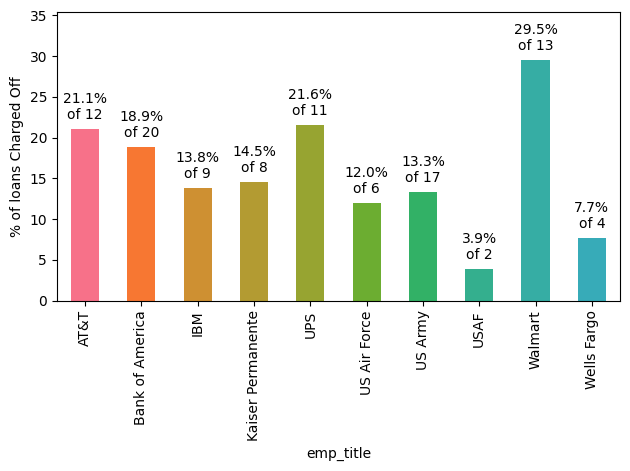

In [128]:
plotLoanStatus(final_loan[final_loan['emp_title'].isin(top_10_emp_title.index.values)], 'emp_title')

<b>emp_length</b> : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [129]:
final_loan.emp_length.value_counts()

emp_length
10    8028
2     4083
0     3978
3     3833
4     3206
5     3043
1     2959
6     2062
7     1638
8     1361
9     1176
Name: count, dtype: int64

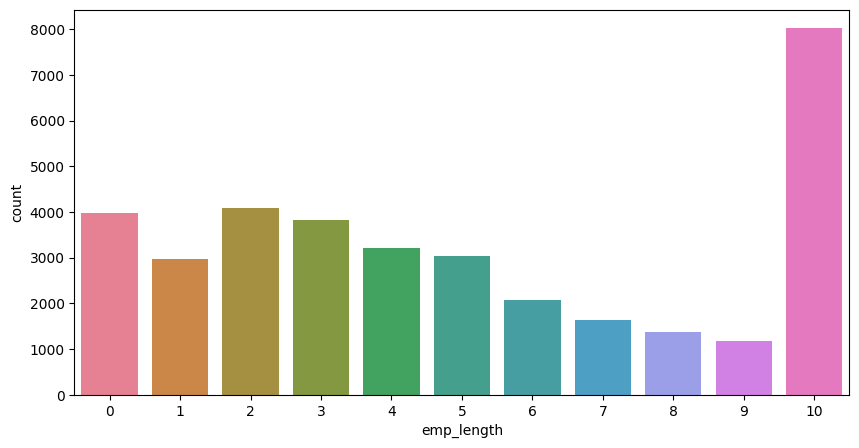

In [130]:
plt.figure(figsize=(10,5))
sns.countplot(final_loan,x='emp_length',palette='husl')
plt.show()

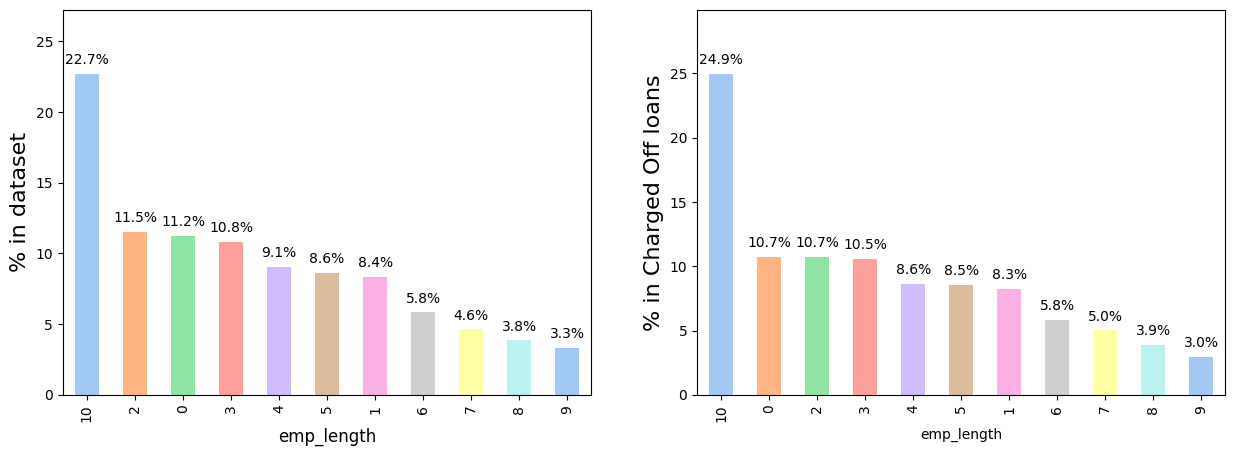

In [131]:
plt.figure(figsize=(15, 5))
plot_percentages(final_loan, 'emp_length')

<b>Observation :</b>

<li>22.7% of the of loan taker have an employment length of more than 10 years.
<li>There is no impact of employment length to chance of loan default.

<b>home_ownership</b> : The home ownership status provided by the borrower during registration. Our values are: <b>RENT, OWN, MORTGAGE, OTHER.</b>

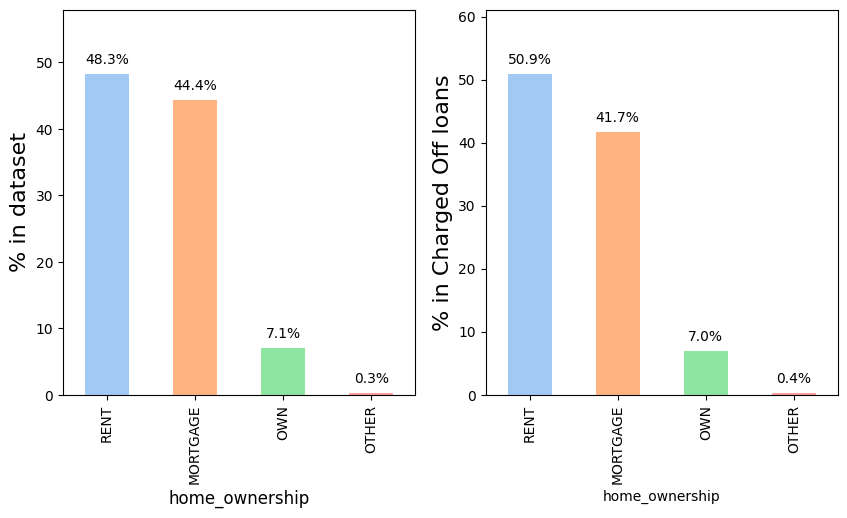

In [132]:
plt.figure(figsize=(10,5))
plot_percentages(final_loan, 'home_ownership')

<b>Observation :</b>

<li>There is no impact of home_ownership to default on loan.

<b>annual_inc </b> : The self-reported annual income provided by the borrower during registration.

In [133]:
final_loan.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
90%      1.150000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [134]:
# Let's get rid of outliers to analyze annual income. 
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
dataframe = final_loan[np.abs(final_loan.annual_inc-final_loan.annual_inc.mean()) <= (3*final_loan.annual_inc.std())]

In [135]:
dataframe.annual_inc.describe()

count     35122.000000
mean      66255.515193
std       35749.840874
min        4000.000000
25%       41004.000000
50%       59449.000000
75%       81969.000000
max      260000.000000
Name: annual_inc, dtype: float64

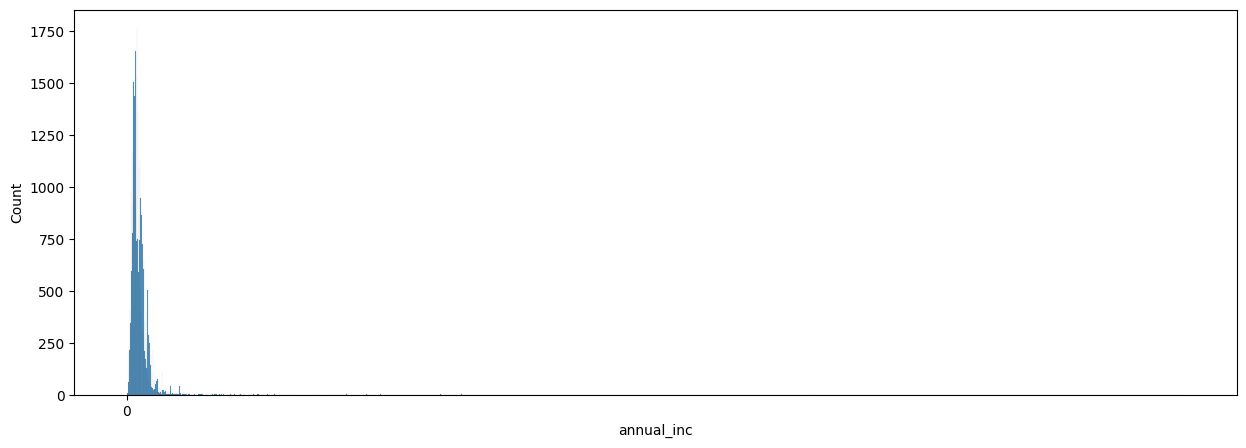

In [143]:
plt.figure(figsize=(15, 5))
sns.histplot(final_loan['annual_inc'])
plt.xticks(np.arange(0, 10000, 20000))
plt.show()

<b>Observation :</b>

<li>10000 seems to be a good bin size to further analyze income as categories

In [144]:
#Create Derived categorical variable
final_loan['income_bin'] = (final_loan['annual_inc']/20000).astype(int)

[Text(0, 0, '0-10k'),
 Text(1, 0, '10-20k'),
 Text(2, 0, '20-30k'),
 Text(3, 0, '30-40k'),
 Text(4, 0, '40-50k'),
 Text(5, 0, '50-60k'),
 Text(6, 0, '60-70k'),
 Text(7, 0, '70-80k'),
 Text(8, 0, '80-90k'),
 Text(9, 0, '90-100k'),
 Text(10, 0, '100-110k'),
 Text(11, 0, '110-120k'),
 Text(12, 0, '120-130k'),
 Text(13, 0, '130-140k'),
 Text(14, 0, '140-150k'),
 Text(15, 0, '150-160k'),
 Text(16, 0, '160-170k'),
 Text(17, 0, '170-180k'),
 Text(18, 0, '180-190k'),
 Text(19, 0, '190-200k'),
 Text(20, 0, '200-210k')]

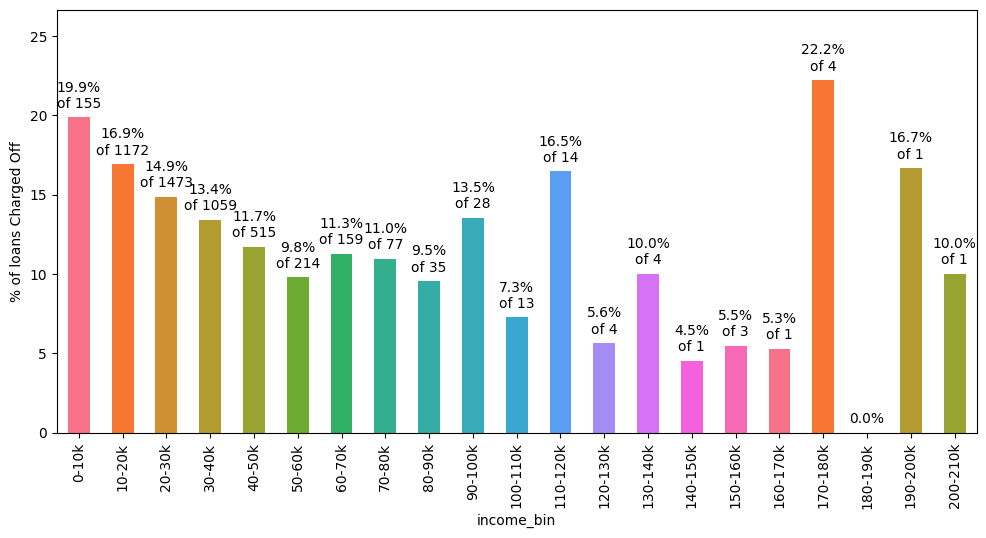

In [145]:
plt.figure(figsize=(10,5))
ax = plotLoanStatus(final_loan.loc[final_loan['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])

<b>Observation :</b>

<li>Loan defaults are higher for lower income, and progressively reduce as incomes go up.
<li>It will be interesting to see a bivariate analysis of defaults by income buckets and loan amounts later.

<b>verification_status </b>: Indicates if income was verified by LC, not verified, or if the income source was verified

In [146]:
final_loan.verification_status.value_counts()

verification_status
Not Verified       14840
Verified           11363
Source Verified     9164
Name: count, dtype: int64

Loans <b>'Verified'</b> and <b>'Source Verified'</b> status both imply that LC has cross checked the income value specified by the borrower and thus both status can be treated as one.

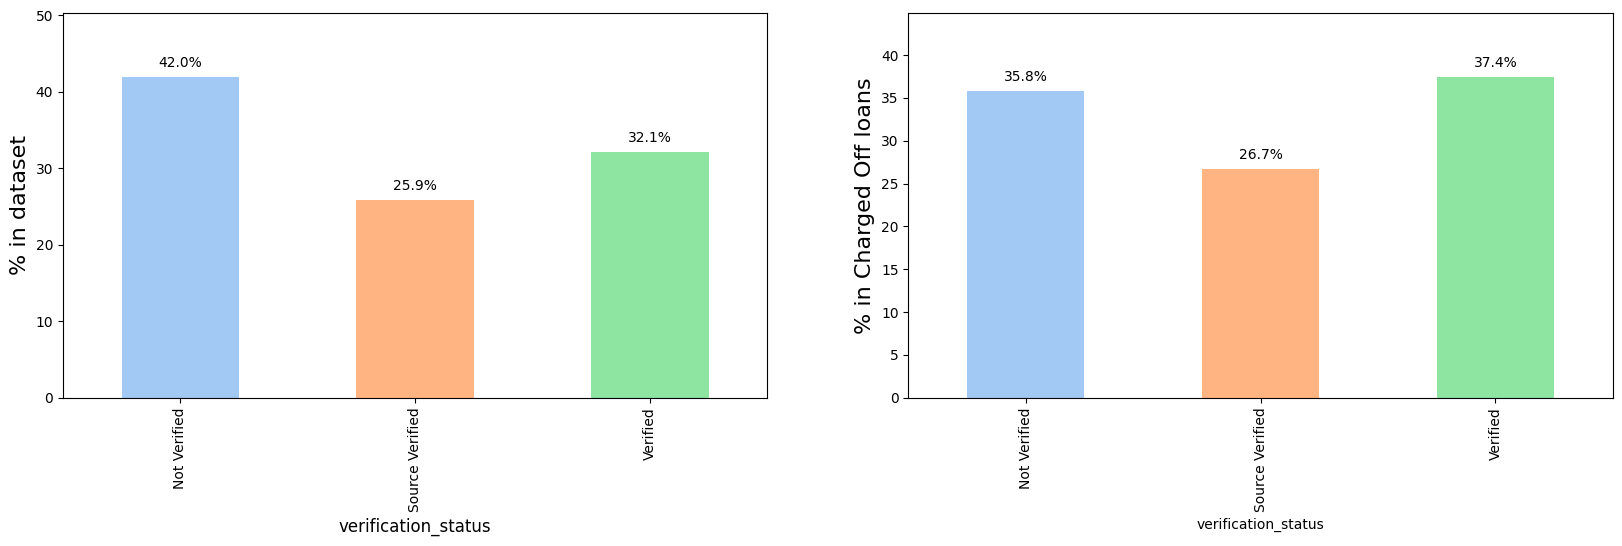

In [147]:
plt.figure(figsize=(20,5))
plot_percentages(final_loan, 'verification_status', True)

<b>Observation :</b>

<li>Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.
<li>Verified loans show more charged Off percentage as compared to Not verified loans. This is unexpected and will be investigated later in bivariate analysis

<b>issue_d</b> : The month which the loan was funded

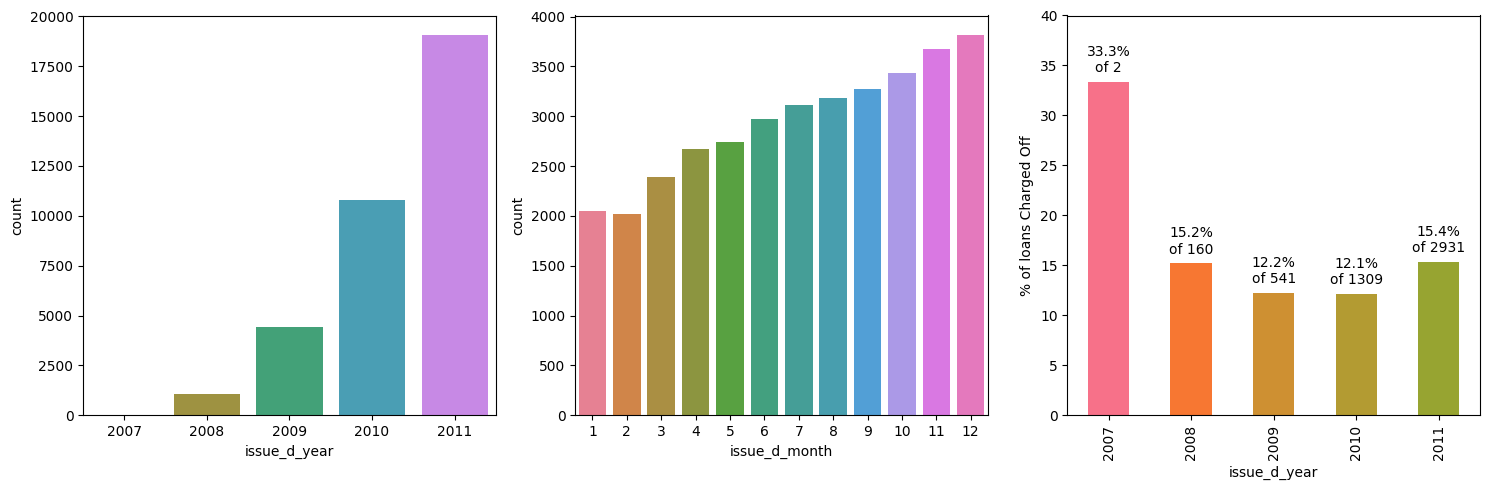

In [148]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(final_loan, x='issue_d_year', order=sorted(final_loan.issue_d_year.unique()),palette='husl')

plt.subplot(1, 3, 2)
sns.countplot(final_loan, x='issue_d_month', order=sorted(final_loan.issue_d_month.unique()),palette='husl')

#Fraction of loans charged off and fully Paid
plt.subplot(1, 3, 3)
plotLoanStatus(final_loan, 'issue_d_year')

plt.show()

<b>Observation :</b>

<li>Over the years, LC as an organisation has been giving more loans. From Aug,2007 to 2011 the loans issued have risen significantly.
<li>Within a year, the number of loan issued rises over the month from jan to Dec. Dcember is the month of the year were the maximum number of loans are being issued. 
<li>Year of loan has no significant effect on likelihood of default.

<Axes: xlabel='issue_d_month', ylabel='% of loans Charged Off'>

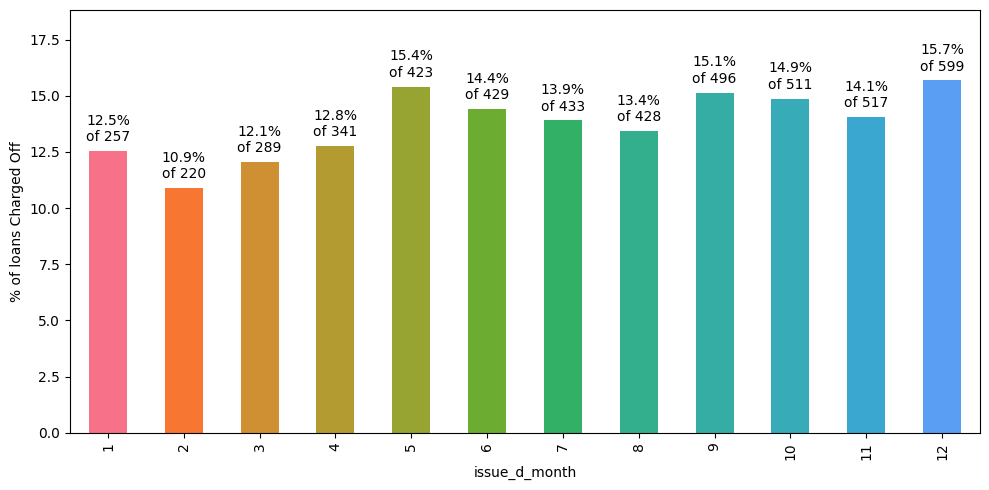

In [149]:
plt.figure(figsize=(10, 5))
plotLoanStatus(final_loan, 'issue_d_month')

<b>Observation:</b>

<li>Month of loan is spread out and has no significant effect on likelihood of default.

**title** : The loan title provided by the borrower

In [150]:
final_loan.title.describe()

count                  35367
unique                 17662
top       Debt Consolidation
freq                    1975
Name: title, dtype: object

- title column has 17662 unique values describing the loan by the borrower. This information is already captured with purpose column under 14 catergories of purpose. We can choose to drop this column.

In [151]:
final_loan = final_loan.drop('title',axis =1 )

**addr_state** : The state provided by the borrower in the loan application

In [152]:
final_loan.addr_state.value_counts(normalize=True).head(10)

addr_state
CA    0.180847
NY    0.095739
FL    0.071677
TX    0.069358
NJ    0.047134
IL    0.039048
PA    0.038822
VA    0.035626
GA    0.035429
MA    0.033393
Name: proportion, dtype: float64

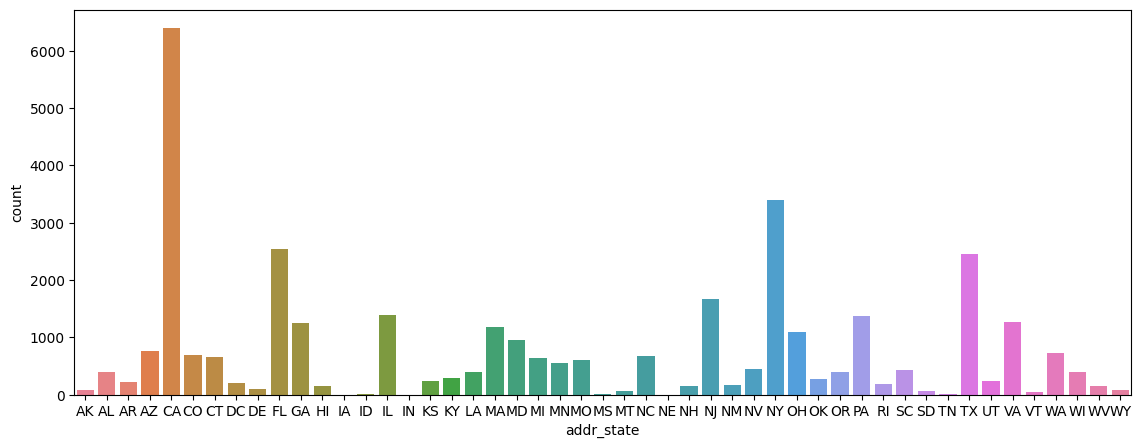

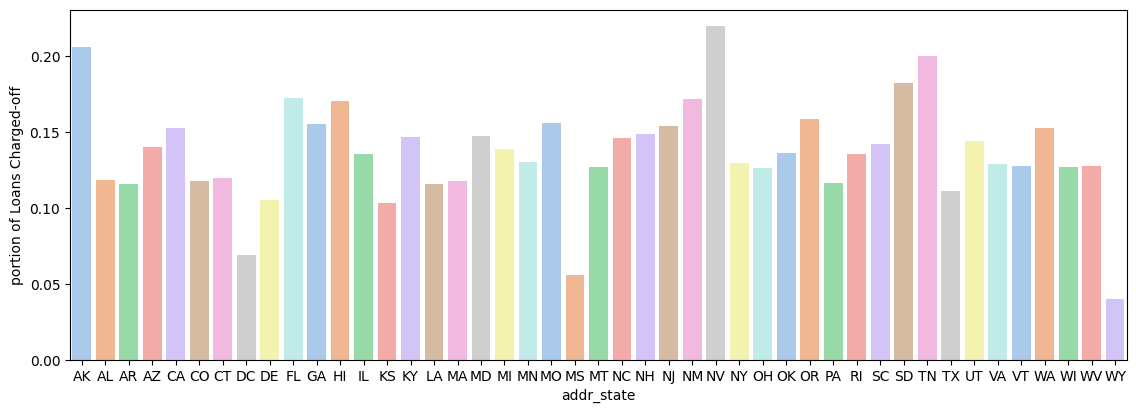

In [153]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(final_loan,x='addr_state', order=sorted(final_loan.addr_state.unique()),palette='husl')

#Fraction of loans charged off and fully Paid
charge_off_count = final_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = final_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values, palette='pastel')
a.set_ylabel('portion of Loans Charged-off')

plt.show()

**Observation** :

- Maximum loans ~18% are from California following that is 9.5% from New york state and Florida with 7%. This is to be expected as these are also the three most populous US states
- States with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and should be ignored. Overall, this variable does not affect propensity to default.

**dti** : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [154]:
final_loan.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

The **dti** index varies from min 0 to max of 30. The median dti is of 13.5

<Figure size 1000x500 with 0 Axes>

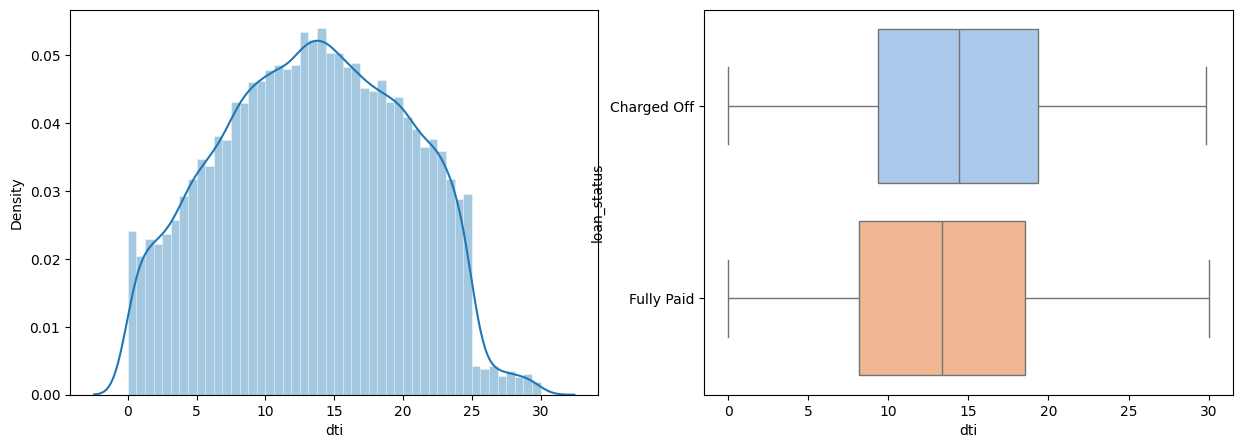

In [155]:
plt.figure(figsize=(10,5))

plot_distribution(final_loan, 'dti')

<Axes: xlabel='dti_bin', ylabel='% of loans Charged Off'>

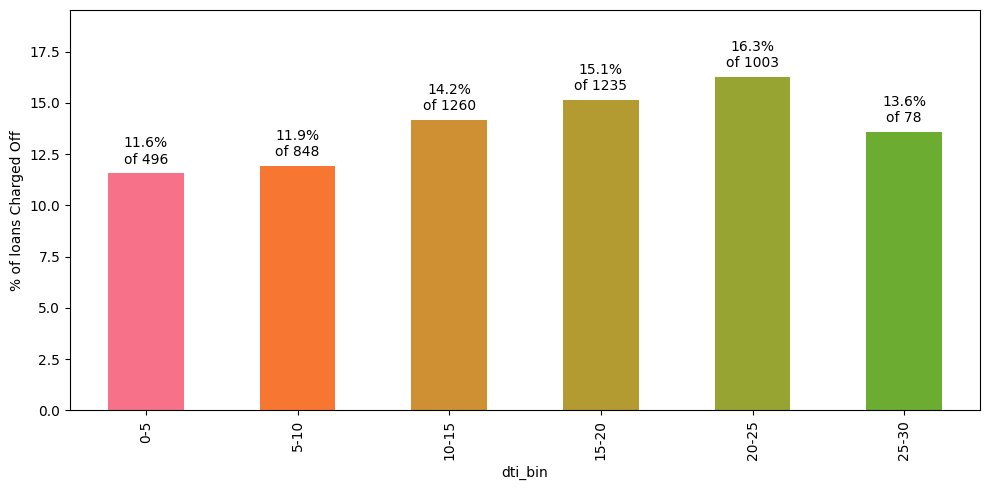

In [156]:
# Create derived variable 
final_loan['dti_bin'] = pd.cut(final_loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
plt.figure(figsize=(10,5))
plotLoanStatus(final_loan, 'dti_bin')

**Observation** :

- When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off
- Higher the dti higher the chances of loan being Charged Off

**delinq_2yrs** : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [157]:
final_loan.delinq_2yrs.value_counts(normalize=True)

delinq_2yrs
0     0.891594
1     0.083100
2     0.017361
3     0.005344
4     0.001499
5     0.000594
6     0.000283
7     0.000113
8     0.000057
9     0.000028
11    0.000028
Name: proportion, dtype: float64

<Axes: xlabel='delinq_2yrs', ylabel='% of loans Charged Off'>

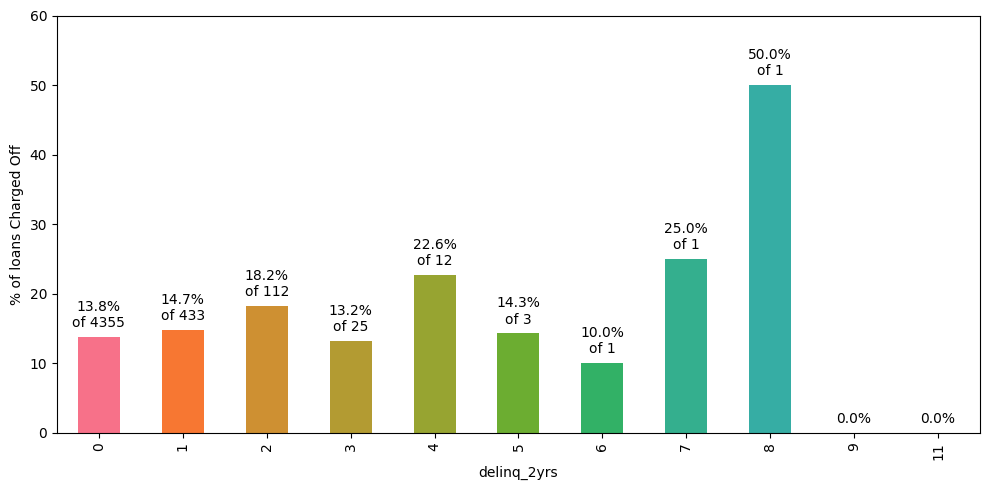

In [47]:
plt.figure(figsize=(10,5))
plotLoanStatus(final_loan, 'delinq_2yrs')

**Observation** :

- The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
- There are higher chances of default if this variable is greater than 1.

**earliest_cr_line** : The month the borrower's earliest reported credit line was opened.

In [158]:
final_loan.earliest_cr_line_year.value_counts(normalize=True).head()

earliest_cr_line_year
2000    0.083326
1999    0.076201
1998    0.072638
2001    0.065259
1997    0.062403
Name: proportion, dtype: float64

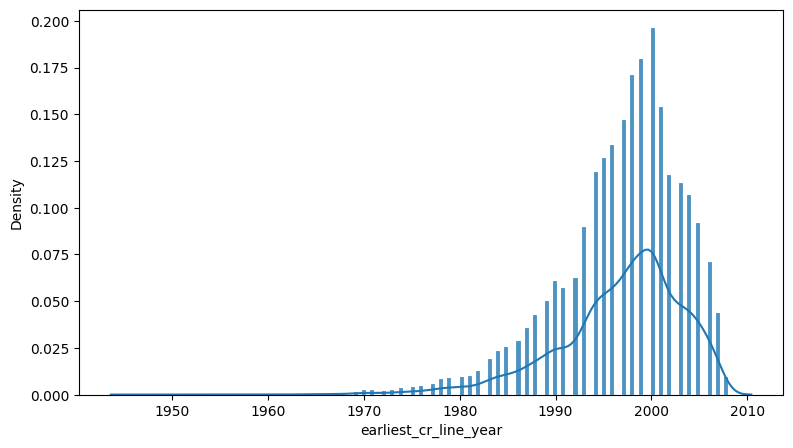

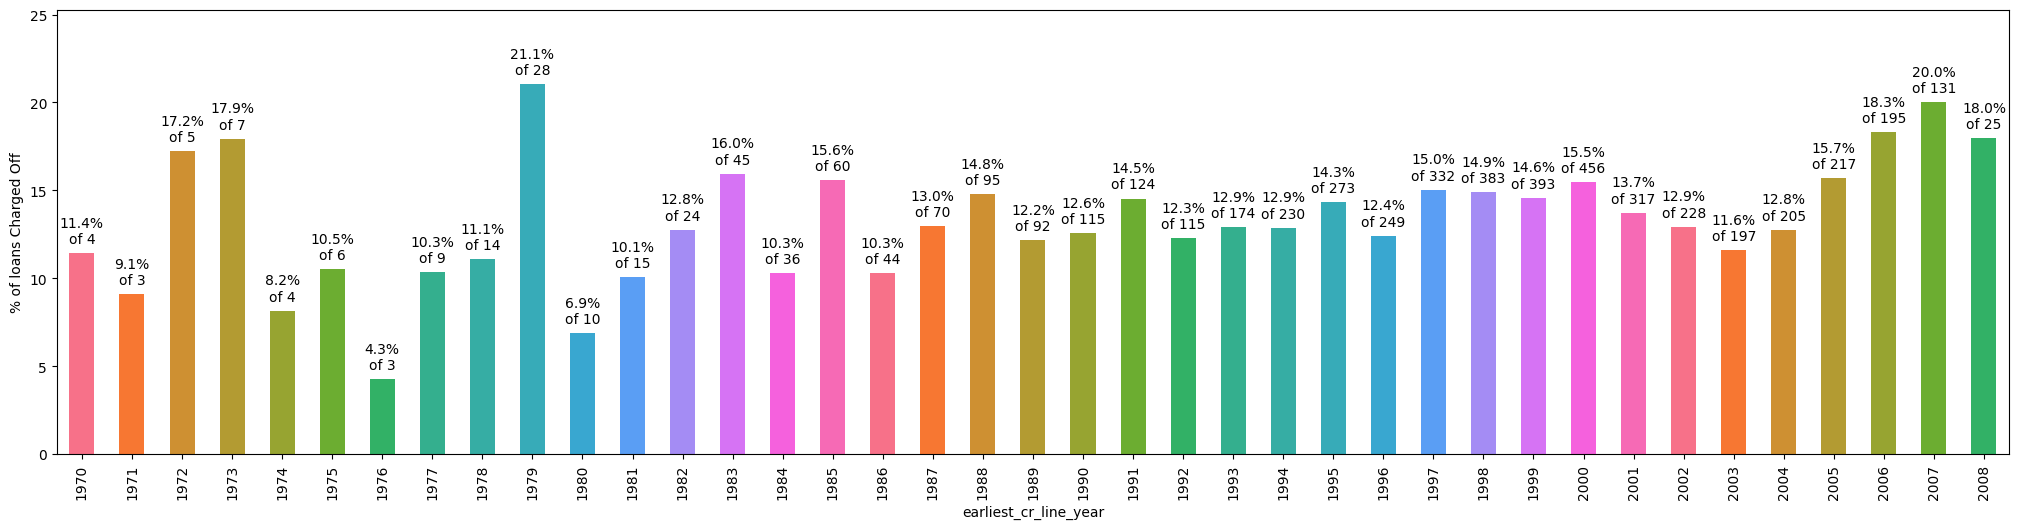

In [159]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)

sns.histplot(
    final_loan["earliest_cr_line_year"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.8, edgecolor=(1, 1, 1, .4),
)

plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
plotLoanStatus(final_loan.loc[final_loan['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()

**Observation** :

- 8% of the loan applicants have 2000 as the year of earliest credit line.
- Newer borrowers are defauling more often. This is possibly related to the 2008 subprime crisis.
- There was another economic crisis in US beginning in 1978 with double digit inflation. Newer borrowers of that time too defaulted more often. In general, those who take their first loans at times of recession, presumably young people, default more often. But this variable can be ignored in our analysis.

**inq_last_6mths** : The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [160]:
final_loan.inq_last_6mths.value_counts(normalize=True)

inq_last_6mths
0    0.485848
1    0.276359
2    0.147256
3    0.076427
4    0.007917
5    0.003478
6    0.001527
7    0.000877
8    0.000311
Name: proportion, dtype: float64

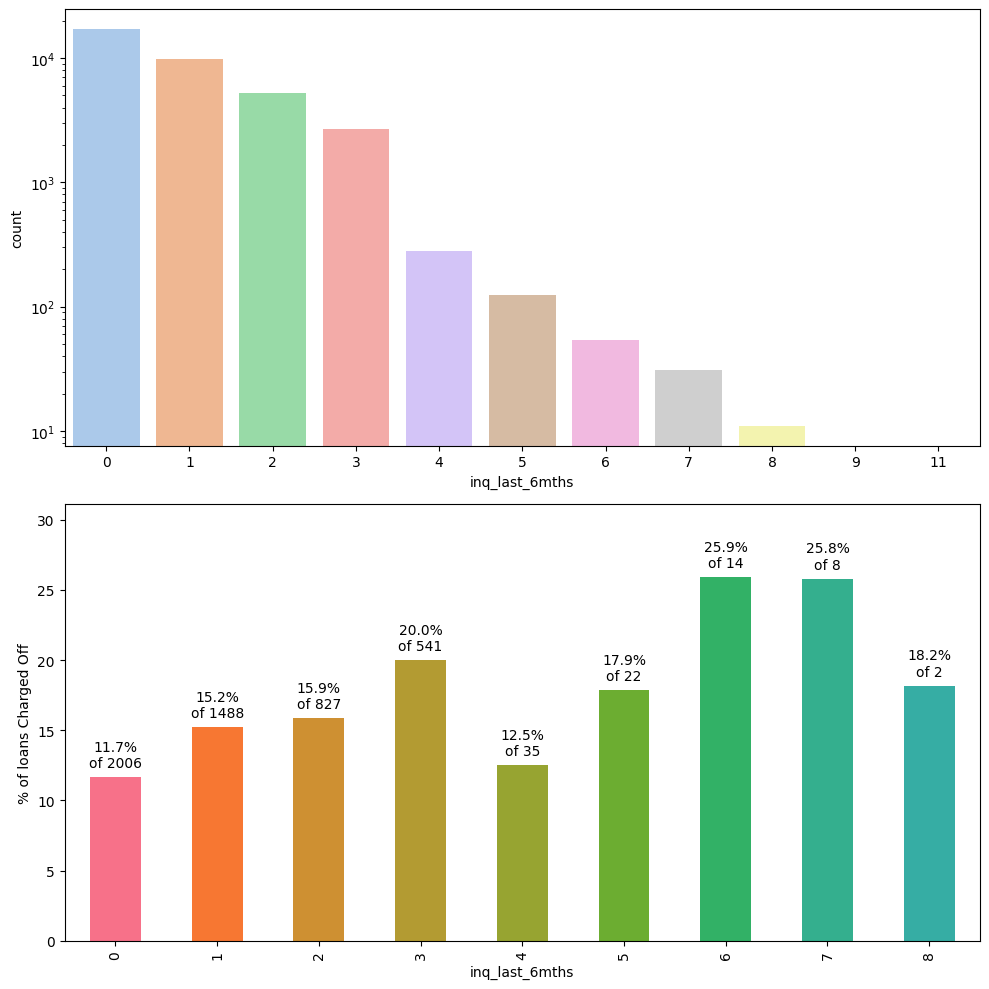

In [161]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(final_loan,x='inq_last_6mths', order=sorted(final_loan.delinq_2yrs.unique()),palette='pastel')
c.set_yscale('log')

plt.subplot(2, 1, 2)
plotLoanStatus(final_loan, 'inq_last_6mths')
plt.show()

**Observation** :

- 48.5% of the borrowers do not make any inquiry
- Those with more than 2 inquiries default at higher rates.
- This is probably correlated to having more loans and can be ignored. The revolving line utilization will cover this.

**open_acc** : The number of open credit lines in the borrower's credit file.

In [162]:
final_loan.open_acc.describe()

count    35367.000000
mean         9.332004
std          4.374975
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

The median of the distribution sugests that by large the borrower's seem to have 9 open credit lines.

<Figure size 1500x500 with 0 Axes>

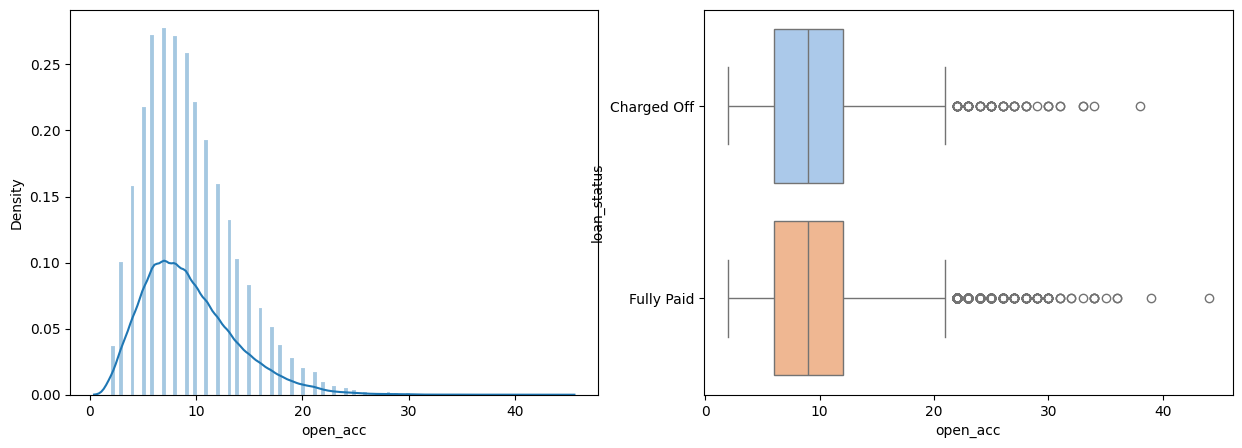

In [163]:
plt.figure(figsize=(15,5))
plot_distribution(final_loan, 'open_acc')
plt.show()

In [164]:
final_loan.groupby('loan_status')['open_acc'].describe()

count      mean       std  min  25%  50%   75%   max
loan_status                                                        
Charged Off   4943.0  9.308517  4.491786  2.0  6.0  9.0  12.0  38.0
Fully Paid   30424.0  9.335820  4.355764  2.0  6.0  9.0  12.0  44.0

**Observation** :

- The median of the distribution suggests that by large the borrower's seem to have 9 open credit lines.
- There is no significant difference in the credit lines of charged off and fully paid loans.

**pub_rec** : Number of derogatory public records.

In [165]:
final_loan.pub_rec.value_counts(normalize=True)

pub_rec
0    0.947663
1    0.050838
2    0.001244
3    0.000198
4    0.000057
Name: proportion, dtype: float64

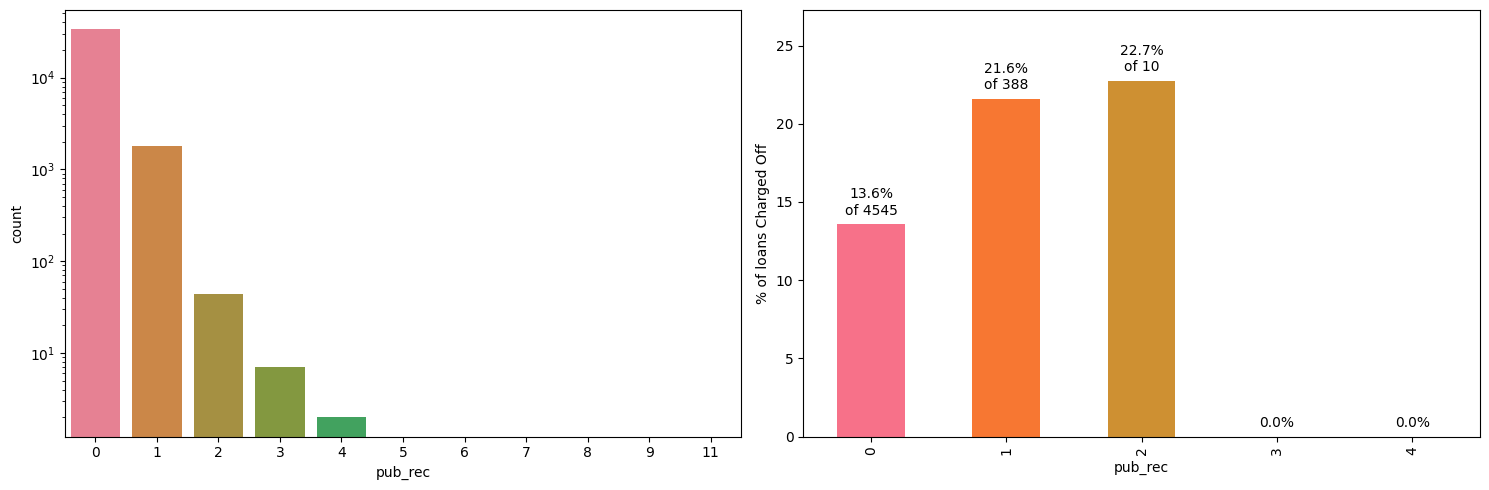

In [166]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
c=sns.countplot(final_loan,x='pub_rec', order=sorted(final_loan.delinq_2yrs.unique()),palette='husl')
c.set_yscale('log')

plt.subplot(1, 2, 2)
plotLoanStatus(final_loan, 'pub_rec')
plt.show()

**Observation** :

- 94% have no Public derogatory records. 5% have 1 derogatory record.
- Having even 1 derogatory record increases the chances of Charge Off significantly.

**revol_bal** : Total credit revolving balance

In [167]:
final_loan.revol_bal.describe()

count     35367.000000
mean      13367.676733
std       15678.460397
min           0.000000
25%        3782.000000
50%        8934.000000
75%       17064.500000
max      149588.000000
Name: revol_bal, dtype: float64

The revolving bal varies from min 0 to max of 150,000. The median revol_bal is of **~9000**.

In [168]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
final_loan = final_loan[np.abs(final_loan.revol_bal-final_loan.revol_bal.mean()) <= (3*final_loan.revol_bal.std())]
final_loan.loc[:,'revol_bal_log'] = final_loan['revol_bal'].apply(lambda x : np.log(x+1))

The values vary a lot. Transforming to a log scale will help analyse better.

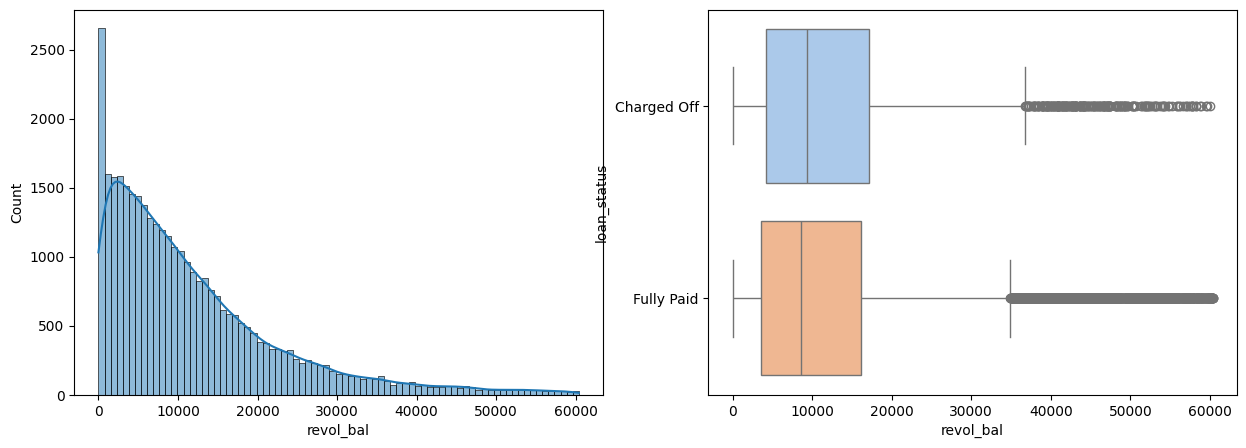

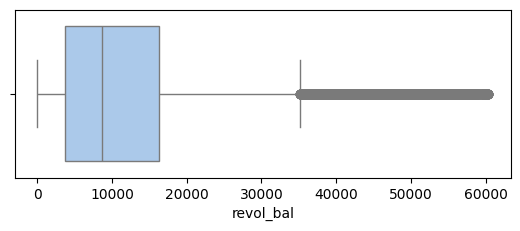

In [169]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.histplot(final_loan['revol_bal'],kde=True)

plt.subplot(1, 2, 2)
sns.boxplot(x=final_loan['revol_bal'], y=final_loan['loan_status'], data=final_loan,palette='pastel')

plt.show()

plt.subplot(2, 1, 1)
sns.boxplot(x=final_loan['revol_bal'], data=final_loan,palette='pastel')
plt.show()

In [170]:
final_loan.groupby('loan_status')['revol_bal'].describe()

count          mean           std  min     25%     50%  \
loan_status                                                             
Charged Off   4858.0  12453.837382  11330.139812  0.0  4161.0  9336.5   
Fully Paid   29739.0  11641.208884  10974.614732  0.0  3612.0  8581.0   

                 75%      max  
loan_status                    
Charged Off  17212.5  60071.0  
Fully Paid   16138.5  60376.0

**Observation** :

- There is no large difference in revolving balance mean for charged off an fully Paid loans

**revol_util** : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [171]:
final_loan.revol_util.describe()

count    34597.000000
mean        48.904609
std         28.210493
min          0.000000
25%         25.600000
50%         49.400000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

<Axes: title={'center': 'revol_util'}, xlabel='loan_status'>

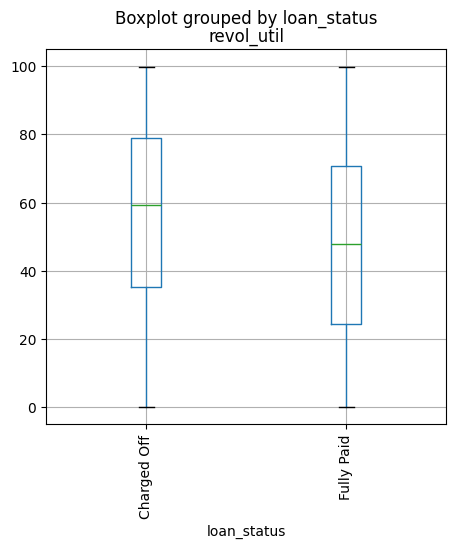

In [172]:
fig, ax = plt.subplots(figsize=(5,5))
final_loan.boxplot(column=['revol_util'],by='loan_status', ax=ax, rot=90)

**Observation** :

- The average utilization rate is around 49%
- Average revolving Utilisation rate is seen to be higher for Charged Off loans than the Fully Paid loans. This requires more analysis.

In [173]:
final_loan['revol_util_bin'] = round(final_loan['revol_util']/5)

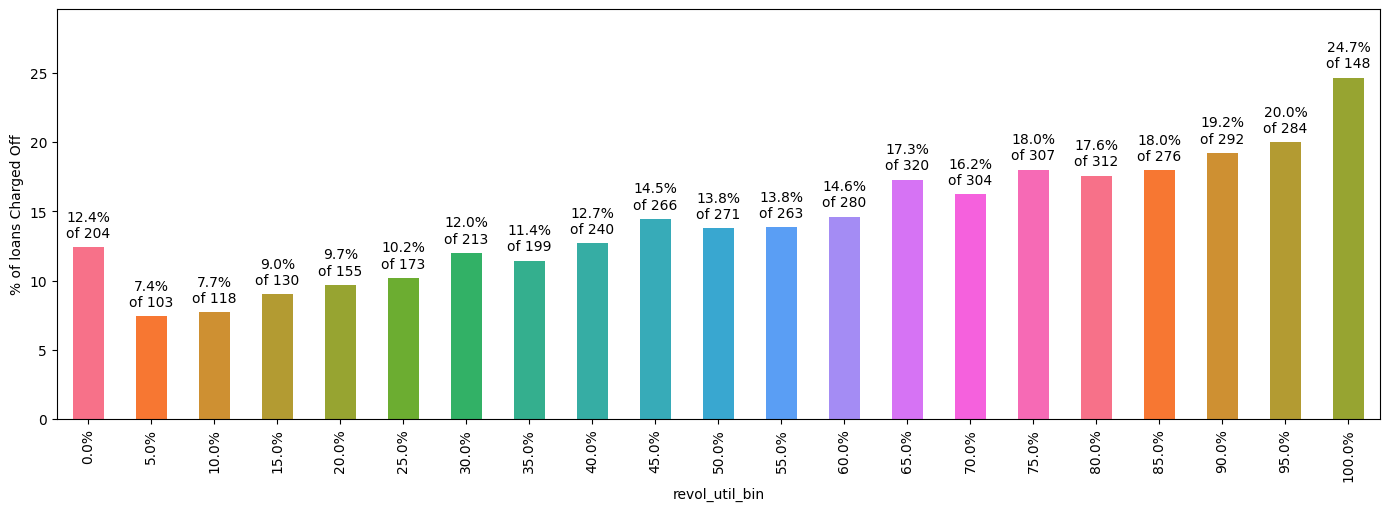

In [174]:
plt.figure(figsize=(14,5))
ax = plotLoanStatus(final_loan, 'revol_util_bin')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.show()

**total_acc** : The total number of credit lines currently in the borrower's credit file.

In [175]:
final_loan.total_acc.describe()

count    34597.000000
mean        22.006272
std         11.325562
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

<Figure size 1500x500 with 0 Axes>

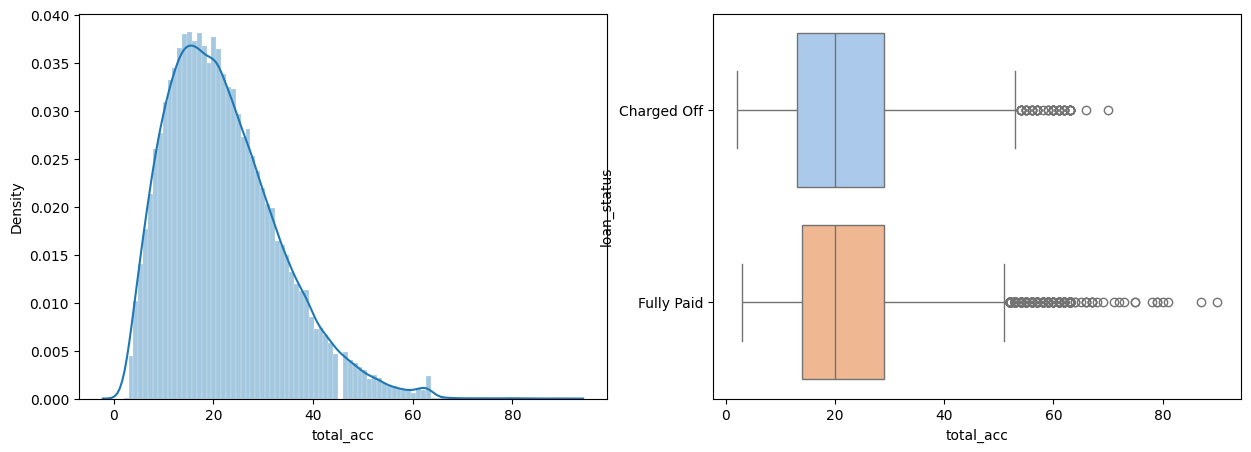

In [176]:
plt.figure(figsize=(15,5))

plot_distribution(final_loan, 'total_acc')


- There are approx. 22 average credit lines for the borrower's.
- There is no big difference between the Charged Off and Fully Paid credit lines

**out_prncp** : Remaining outstanding principal for total amount funded.

In [177]:
final_loan.out_prncp.value_counts()

out_prncp
0.0    34597
Name: count, dtype: int64

In [178]:
final_loan.groupby('loan_status')['out_prncp'].describe()

count  mean  std  min  25%  50%  75%  max
loan_status                                             
Charged Off   4858.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
Fully Paid   29739.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

**Observation** :

- As we are studying how the Fully paid loan are different from the Charged off loans, loan_status = current, has been ingnored for analysis. Therefore out_prncp variable can be removed or droped.

In [179]:
final_loan = final_loan.drop('out_prncp',axis=1)

**out_prncp_inv** : Remaining outstanding principal for portion of total amount funded by investors

In [180]:
final_loan.out_prncp_inv.value_counts()

out_prncp_inv
0.0    34597
Name: count, dtype: int64

In [181]:
final_loan.groupby('loan_status')['out_prncp_inv'].describe()

count  mean  std  min  25%  50%  75%  max
loan_status                                             
Charged Off   4858.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
Fully Paid   29739.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

**Observation** :

- As we are studying how the Fully paid loan are different from the Charged off loans, loan_status = current, has been ignored for analysis. Therefore out_prncp_inv variable can be removed or dropped.

In [182]:
final_loan = final_loan.drop('out_prncp_inv',axis=1)

**total_pymnt** : Payments received to date for total amount funded.

In [183]:
final_loan.total_pymnt.describe()

count    34597.000000
mean     11894.392156
std       8715.509427
min         33.730000
25%       5571.230000
50%       9771.780000
75%      16113.960000
max      58563.680000
Name: total_pymnt, dtype: float64

In [184]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
final_loan = final_loan[np.abs(final_loan.total_pymnt-final_loan.total_pymnt.mean()) <= (3*final_loan.total_pymnt.std())]
final_loan['total_pymnt'] = final_loan['total_pymnt'].apply(lambda x : np.log(x))

<Figure size 1500x500 with 0 Axes>

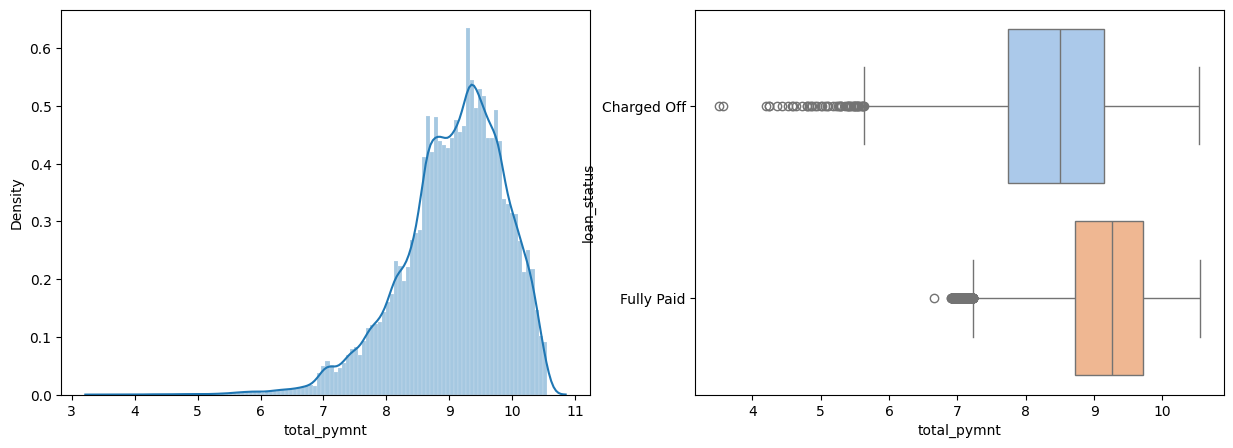

In [185]:
plt.figure(figsize=(15,5))
plot_distribution(final_loan, 'total_pymnt')
plt.show()

**Observation** :

- The average payment received to date for the Charged Off loan is comparatively less than Fully Paid loans.
- This variable may not be avaialble at the time of loan funding. We can drop this varaible from analysis.

In [186]:
final_loan = final_loan.drop('total_pymnt',axis=1)

**last_pymnt_d** : Last month payment was received.

In [187]:
final_loan.last_pymnt_d.value_counts().head()

last_pymnt_d
2013-03-01    940
2014-12-01    846
2013-05-01    828
2013-02-01    795
2012-03-01    781
Name: count, dtype: int64

In [191]:
final_loan['last_pymnt_d_month']= pd.to_datetime(final_loan['last_pymnt_d']).dt.month
final_loan['last_pymnt_d_year']= pd.to_datetime(final_loan['last_pymnt_d']).dt.year

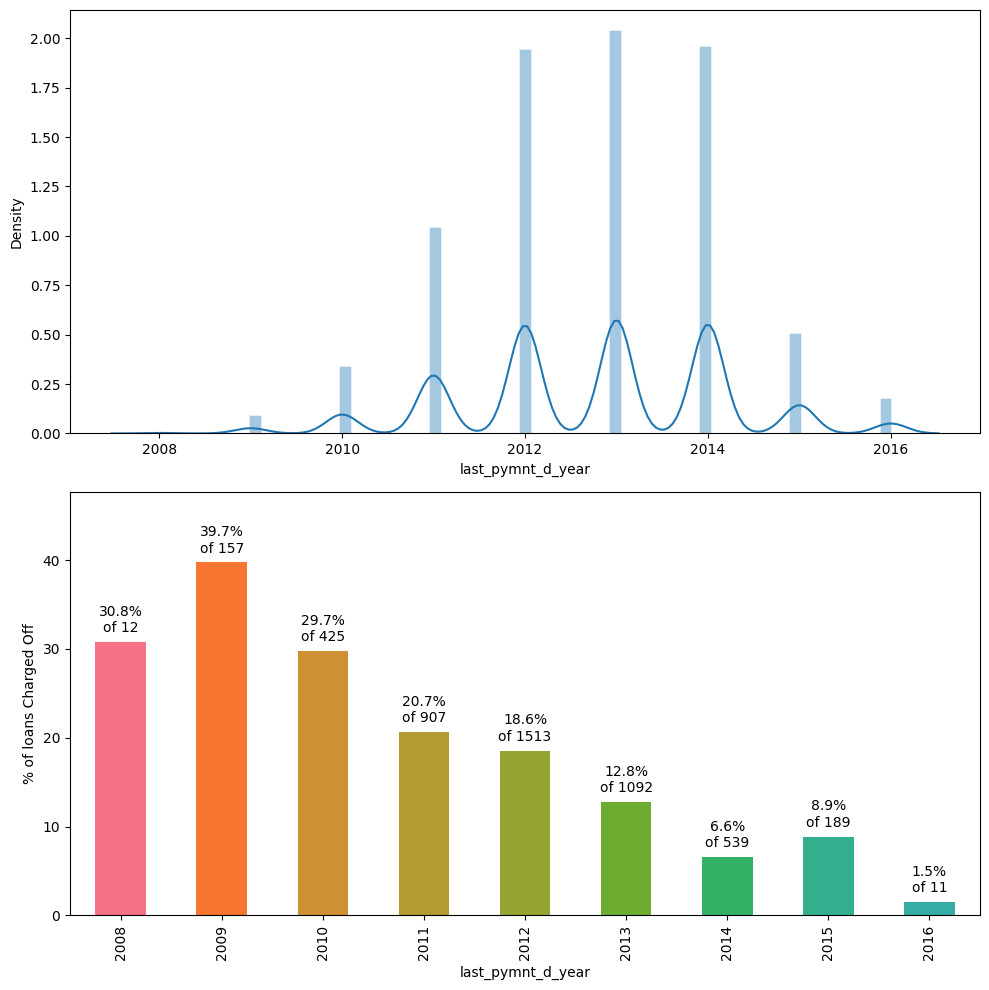

In [193]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)


sns.histplot(
    final_loan['last_pymnt_d_year'], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

plt.subplot(2, 1, 2)
plotLoanStatus(final_loan, 'last_pymnt_d_year')
plt.show()

**Observation** :

- Overall, around 75% of the last payment dates are during 2012-2014 period.
- 40% of loans with a last payment date of 2009 are Charged Off. This is due to the 2008 subprime crisis.
- This variable does not affect analysis and will be ignored.

**last_pymnt_amnt** : Last total payment amount received.

In [194]:
final_loan.last_pymnt_amnt.describe()

count    34074.000000
mean      2646.650918
std       4216.047508
min          0.010000
25%        220.370000
50%        570.625000
75%       3436.620000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

The value vary a lot. Lets conver it to log scale and plot to find trend.

In [195]:
final_loan['last_pymnt_amnt_log'] = final_loan['last_pymnt_amnt'].apply(lambda x : np.log(x+1))

<Figure size 1500x500 with 0 Axes>

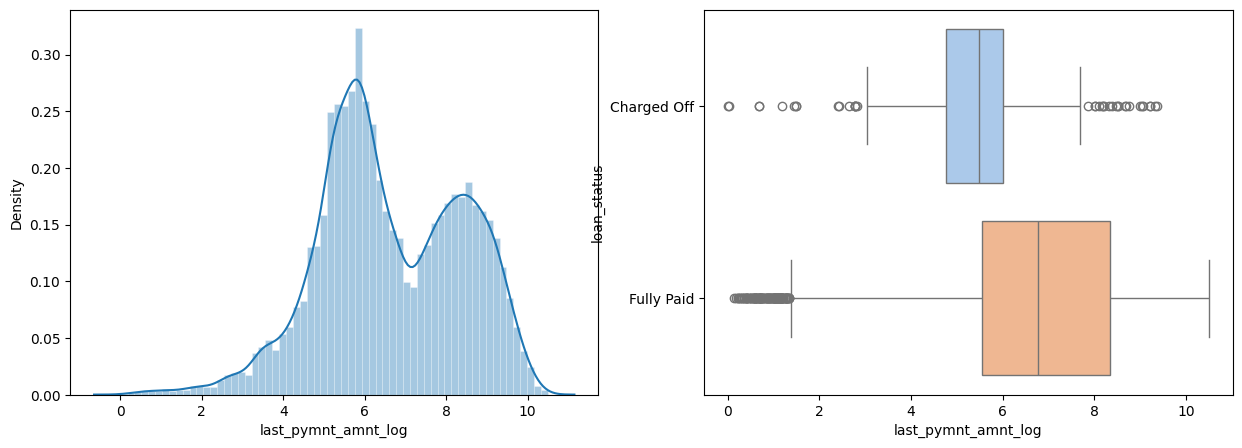

In [196]:
plt.figure(figsize=(15,5))

plot_distribution(final_loan, 'last_pymnt_amnt_log')
plt.show()

**Observation** :
- The last Payment amount received is significantly lower for Charged Off loans as compared to the Fully Paid loans. 
- This is expected in case off charged of loans

**last_credit_pull_d** : The most recent month LC pulled credit for this loan.

In [197]:
final_loan.last_credit_pull_d.value_counts().head()

last_credit_pull_d
2016-05-01    8347
2016-04-01    2106
2016-03-01    1009
2013-02-01     753
2016-02-01     654
Name: count, dtype: int64

In [199]:
final_loan['last_credit_pull_d_month']= pd.to_datetime(final_loan['last_credit_pull_d']).dt.month
final_loan['last_credit_pull_d_year']= pd.to_datetime(final_loan['last_credit_pull_d']).dt.year

In [200]:
final_loan.last_credit_pull_d_year.value_counts(normalize=True)

last_credit_pull_d_year
2016    0.372660
2014    0.162206
2015    0.145008
2013    0.135939
2012    0.106768
2011    0.054646
2010    0.018049
2009    0.004197
2008    0.000528
Name: proportion, dtype: float64

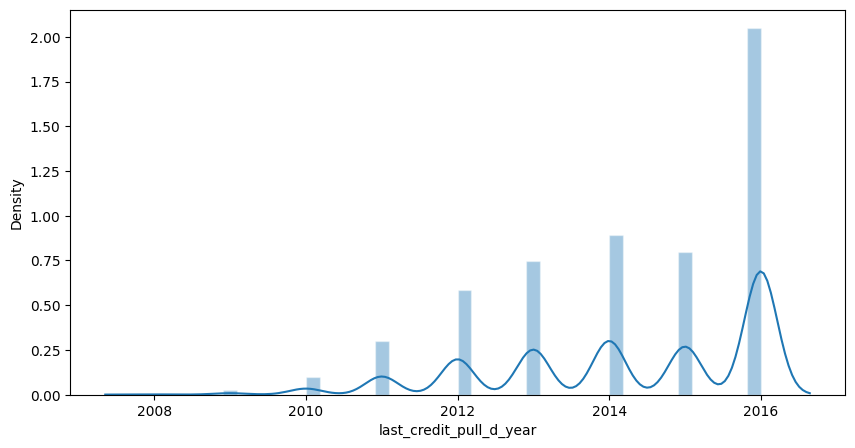

In [202]:
plt.figure(figsize=(10,5))

sns.histplot(
    final_loan['last_credit_pull_d_year'], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)
plt.show()

**Observation** :

- Lending Club is pulling more credit reports in recent years, suggesting that the company is taking bad loans more seriously
- This variable can be ignored in our analysis.

### Derived variable - ratio of loan amount to annual income

<Axes: xlabel='ratio', ylabel='Density'>

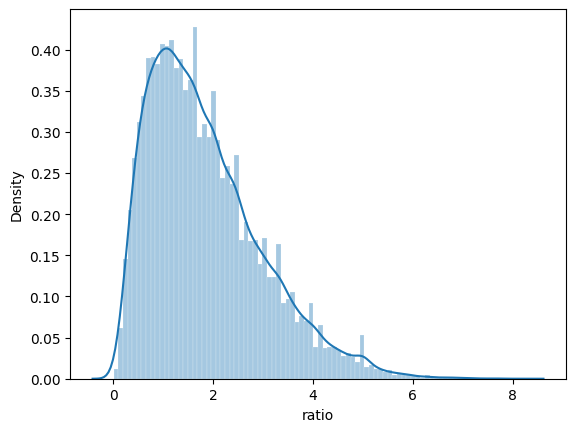

In [204]:
final_loan['ratio'] = final_loan['loan_amnt'] * 10 / final_loan['annual_inc']
 
sns.histplot(
    final_loan['ratio'], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

<Axes: xlabel='ratio_bin', ylabel='% of loans Charged Off'>

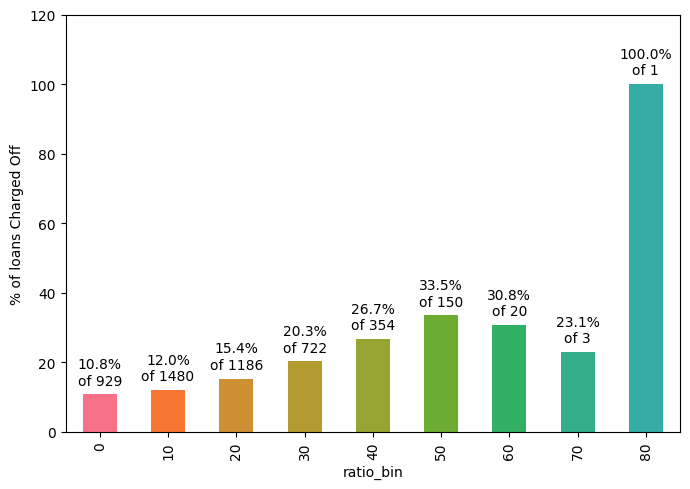

In [205]:
final_loan['ratio_bin'] = (final_loan['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plotLoanStatus(final_loan, 'ratio_bin')

**Observation** :

- As long as loan amount is less than 20% of annual income, defaults are low.
- Loan amounts of 30% of annual income or higher see a high rate of default.

## Bivariate Analysis

**loan_amnt over time**

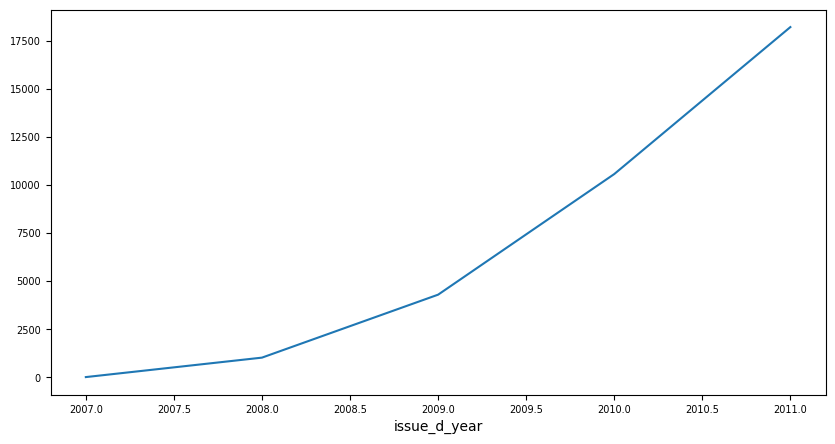

In [207]:
plt.figure(figsize=(10,5))
final_loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

**Avg. loan_amnt over time**

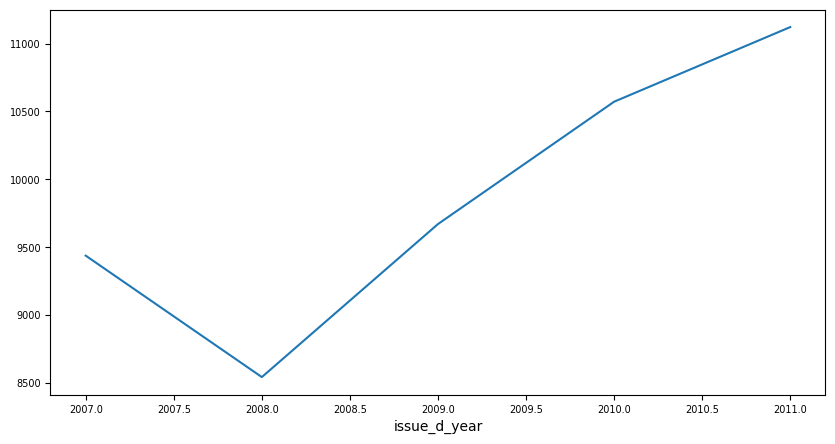

In [208]:
plt.figure(figsize=(10,5))
final_loan.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

**Observation** :

- Average loan amount dropped sharply during the 2008 recession

**loan_amnt and annual_inc**


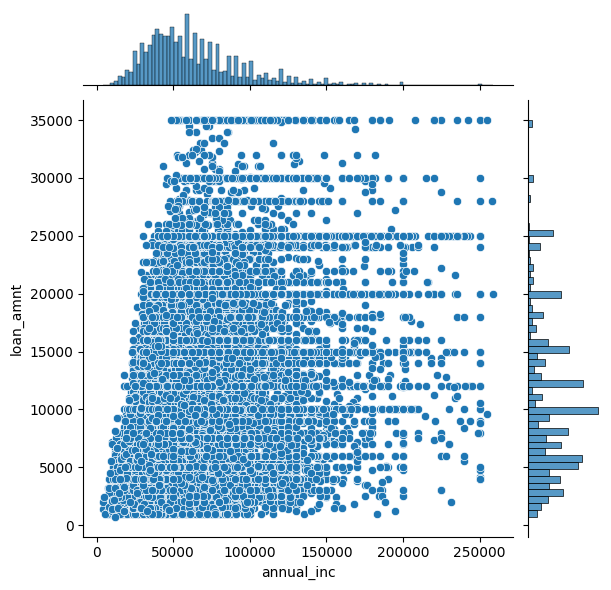

In [210]:
sns.jointplot(final_loan.loc[final_loan['annual_inc']<260000],x='annual_inc', y='loan_amnt')
plt.show()

**Observation** :

- There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans

**loan_amnt vs grade**

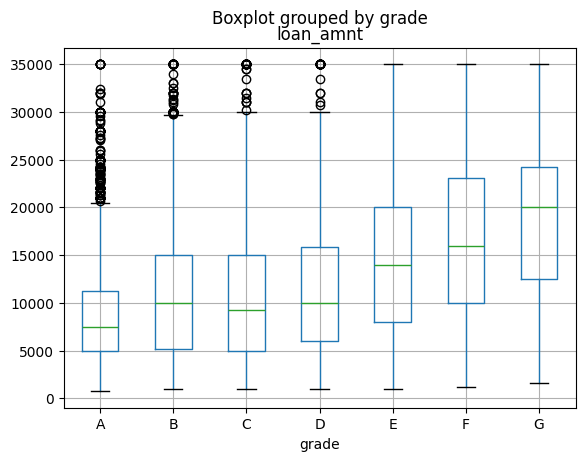

In [211]:
final_loan.boxplot(column='loan_amnt', by='grade')
plt.show()

**Observation** :

- Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

**annual income with grade**

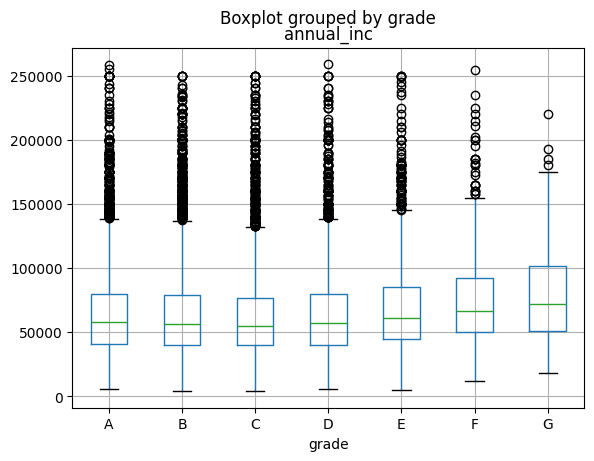

In [212]:
final_loan.loc[final_loan['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

**loan_amnt vs verification_status vs loan status**

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

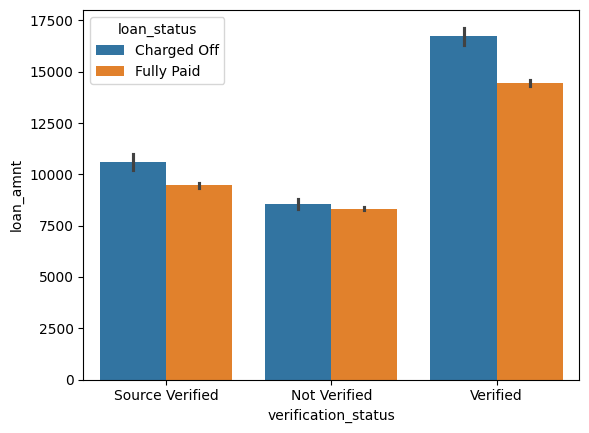

In [213]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=final_loan, estimator=np.mean)

**Observation** :

- Higher loan amounts are Verified more often.
- We already know that larger loans are less in number, but see a higher charge off rate.
- This, combined with previous observation, explains why verfied loans see a higher rate of default. It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club.

**Interest Rate and Term**

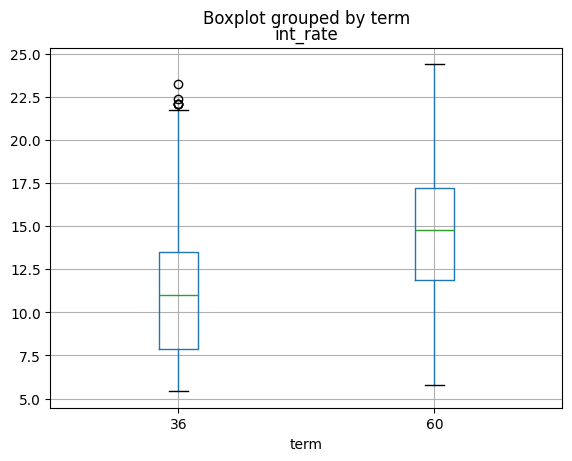

In [214]:
final_loan.boxplot(column='int_rate', by='term')
plt.show()

**Observation** :

- Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

**Interest Rate and Sub Grade**

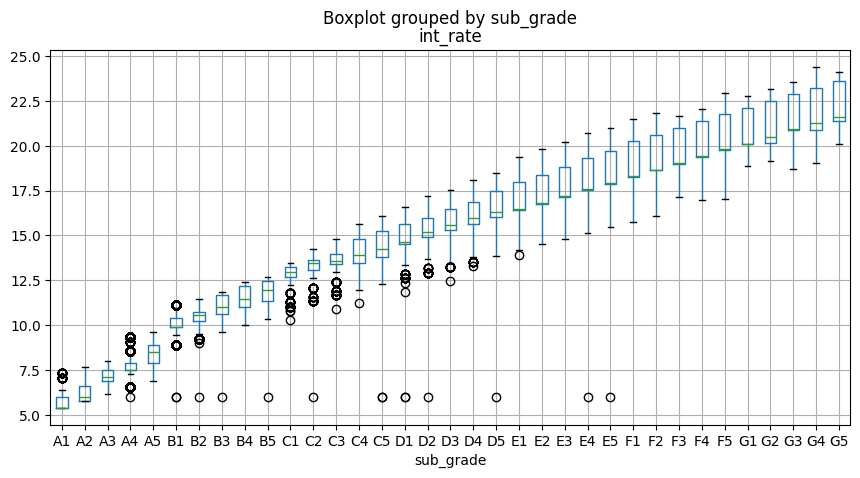

In [215]:
final_loan.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

**Observation** :

- Intrest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan

<Axes: title={'center': 'int_rate'}, xlabel='loan_status'>

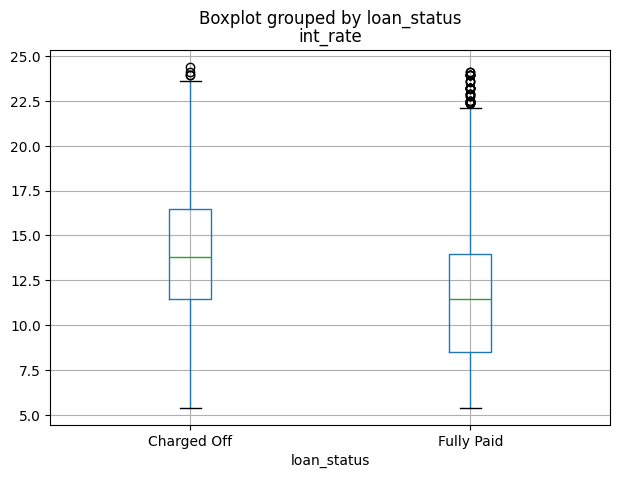

In [216]:
final_loan.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

**Observation** :

- Loans at a higher intrest rate are more likely to be Charged Off.

**Loan amount vs Grade vs Term**

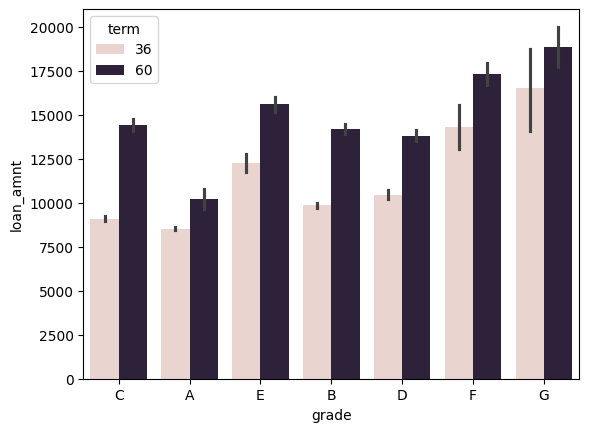

In [218]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=final_loan, estimator=np.mean)
plt.show()

**Observation** :

- Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.

**revol_util Vs grade Vs Loan Status**

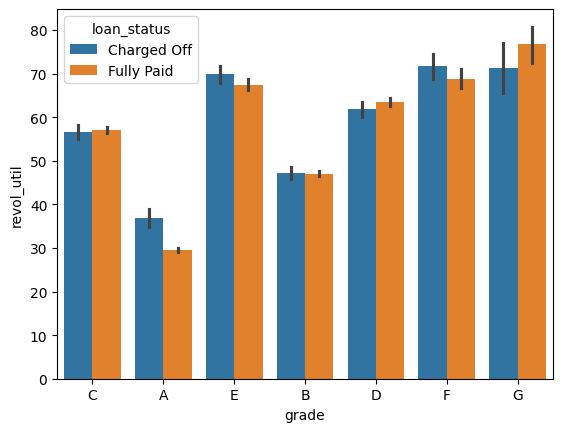

In [219]:
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=final_loan, estimator=np.mean)
plt.show()

**Observation** :

- revol_util and grade(and therefore int_rate) are correlated in some way. The revol_util is positivly correlated to the grade. As the grade goes from A to E the revol_util also increases. This may be because higer loan amounts are accosiated with higher grades.

**Loan amount Vs addr_state vs loan Status**

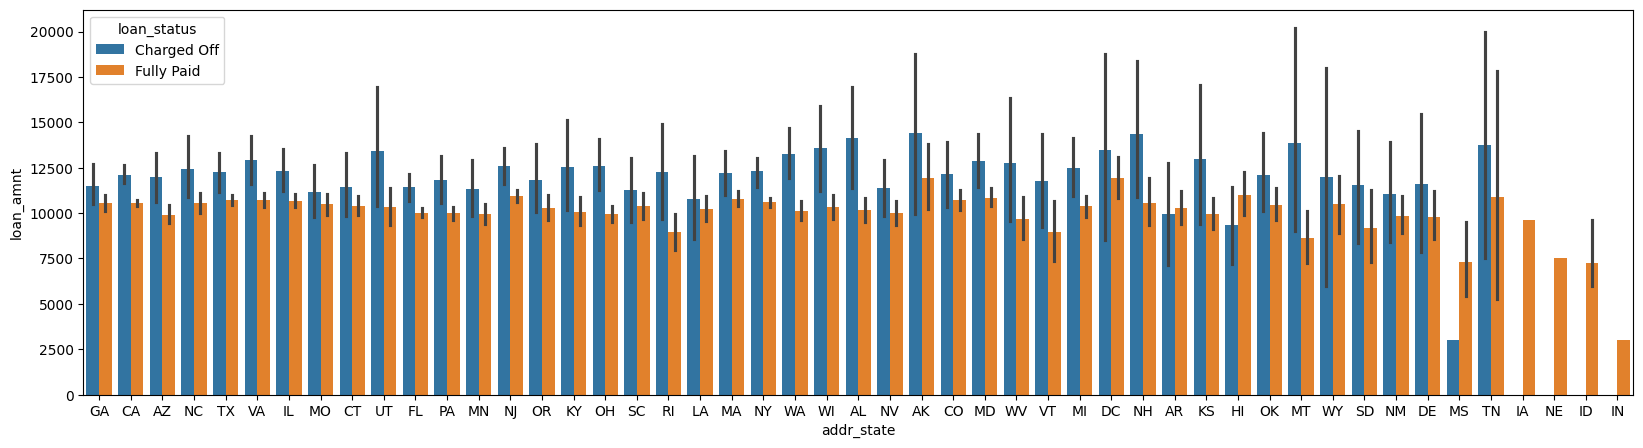

In [220]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=final_loan, estimator=np.mean)
plt.show()

**Observation** :

- __States WY:__ Wyoming has the the highest average loan amount that was charged off. whats happening in this state is somthing LC can investigate into for this state.

**revol_rate Vs int_rate**

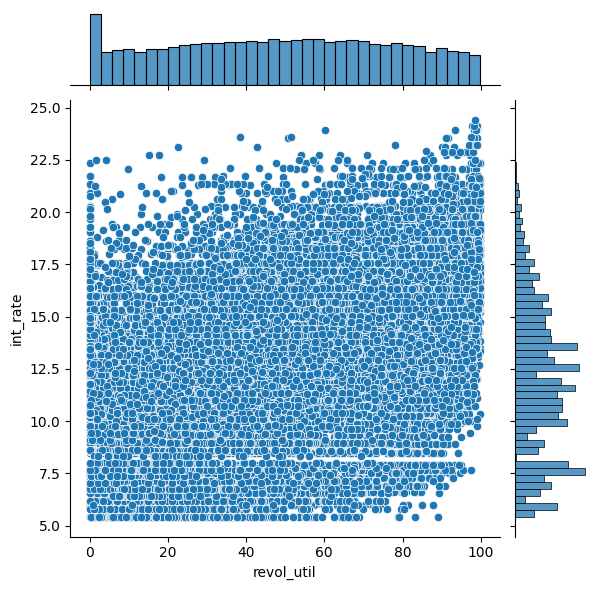

In [222]:
sns.jointplot(final_loan,x='revol_util', y='int_rate')

**revol_util vs Grade**

<Figure size 2000x500 with 0 Axes>

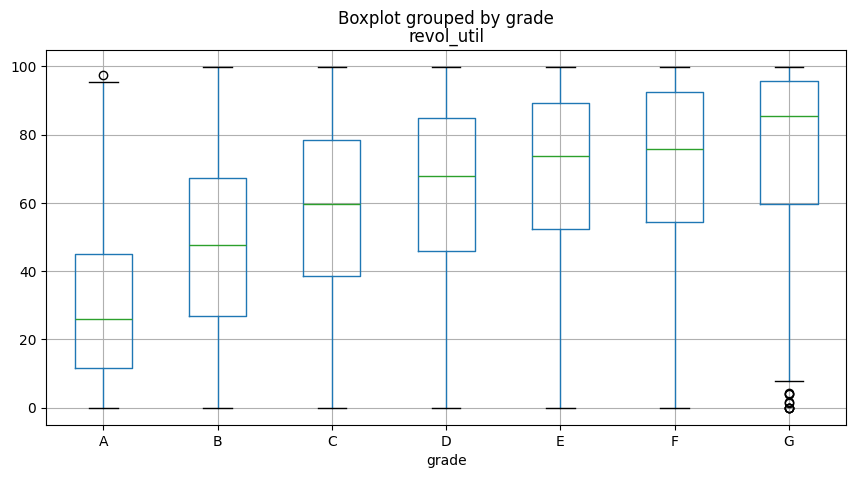

In [223]:
plt.figure(figsize=(20,5))
final_loan.boxplot(column='revol_util', by='grade',figsize=(10,5))
plt.show()

In [232]:
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc',  'last_pymnt_amnt', 
       'pub_rec_bankruptcies']
corr=final_loan[cont_var].corr()
corr['loan_amnt']
 

loan_amnt               1.000000
int_rate                0.267460
installment             0.924973
emp_length              0.139453
annual_inc              0.227570
dti                     0.063434
delinq_2yrs            -0.040534
inq_last_6mths          0.010051
open_acc                0.166074
pub_rec                -0.040321
revol_bal               0.349543
revol_util              0.061901
total_acc               0.244417
last_pymnt_amnt         0.441570
pub_rec_bankruptcies   -0.023352
Name: loan_amnt, dtype: float64

<Axes: >

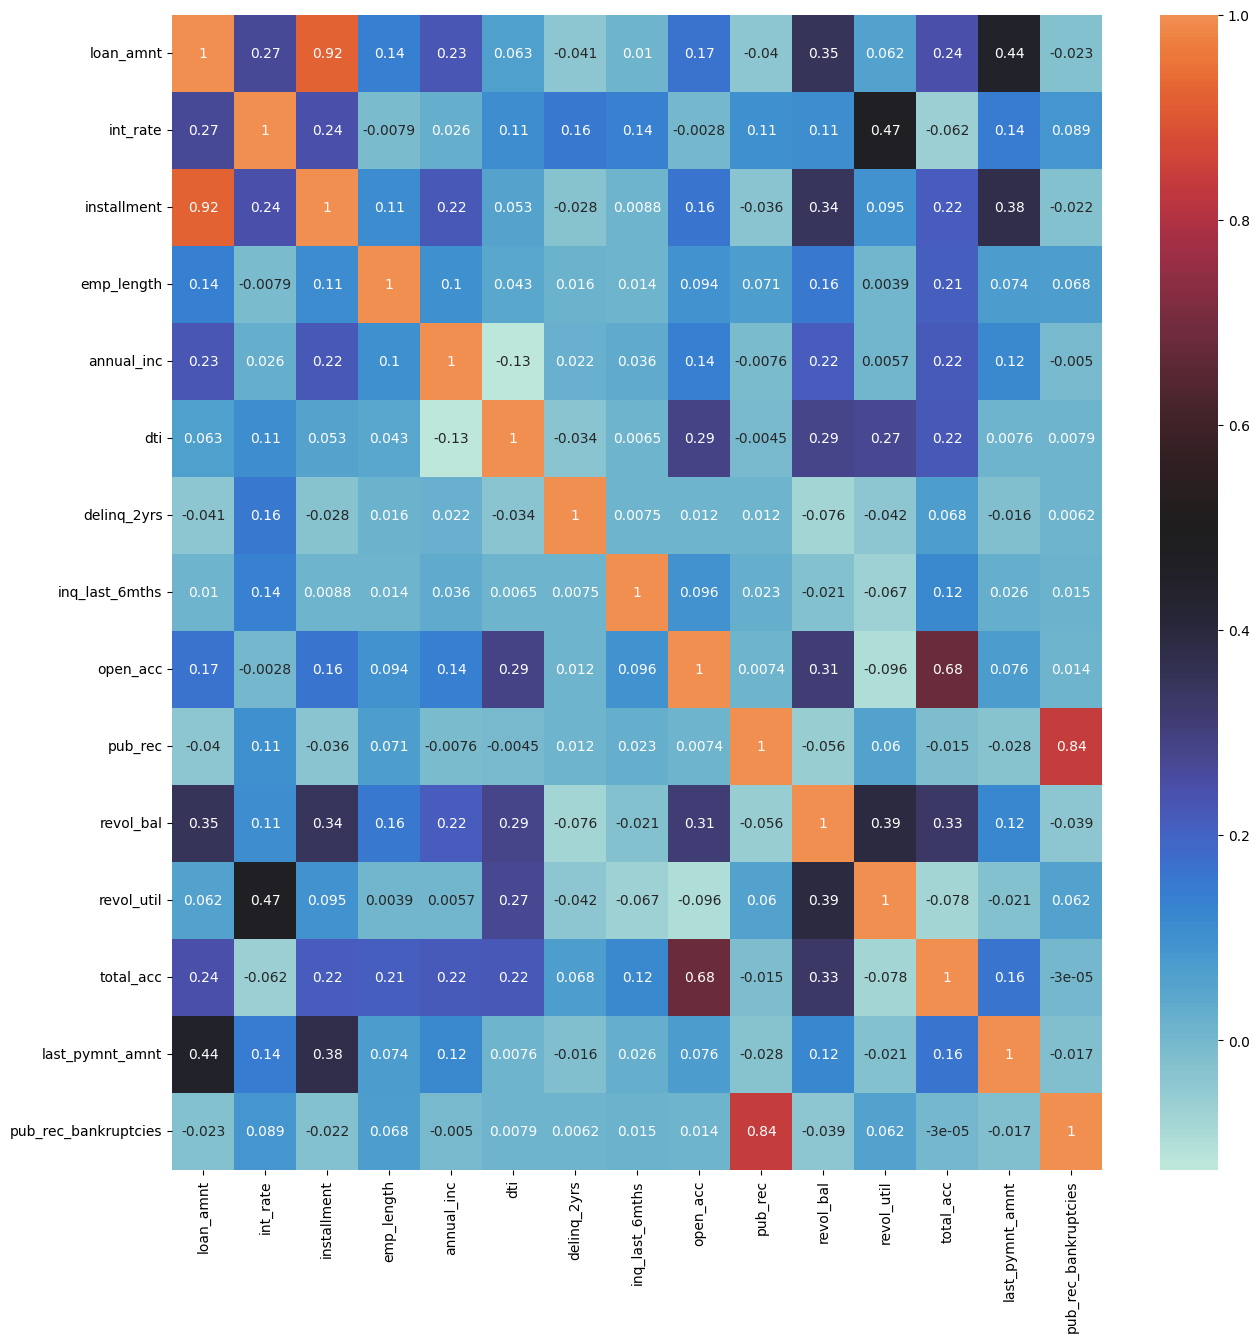

In [233]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc',  'last_pymnt_amnt', 
       'pub_rec_bankruptcies']
corr = final_loan[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

**Observation** :

- __loan_amnt__ is correlated to last_payment_amount with r factor.44, as expected
- __int_rate__ is correlated to revol_util with r factor of .47 - This is good, as company is charging higher interest from riskier loan.
- __loan_amnt revol_bal__ are correlated with r factor .35 - This is not good as it suggests that higher loan amount is being approved to riskier borrowers.
- __delinq_2yrs__ is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features with individual predictive value.

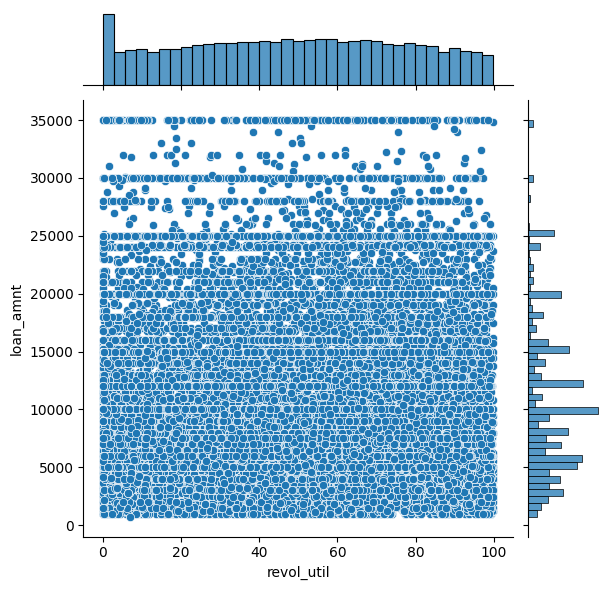

In [235]:
sns.jointplot(final_loan,x='revol_util', y='loan_amnt')

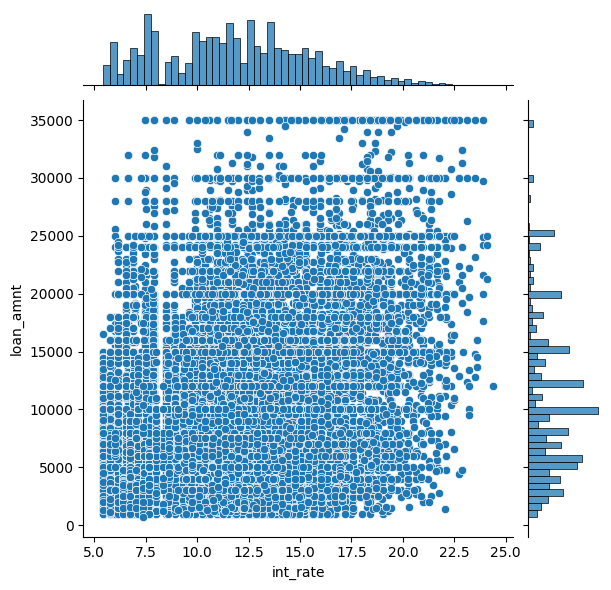

In [236]:
sns.jointplot(final_loan,x='int_rate', y='loan_amnt')

**dti vs open_acc**

In [237]:
final_loan['dti_bin']
final_loan.groupby('dti_bin').int_rate.mean()

dti_bin
0-5      11.052034
5-10     11.529209
10-15    11.972936
15-20    12.308956
20-25    12.565350
25-30     9.505806
Name: int_rate, dtype: float64

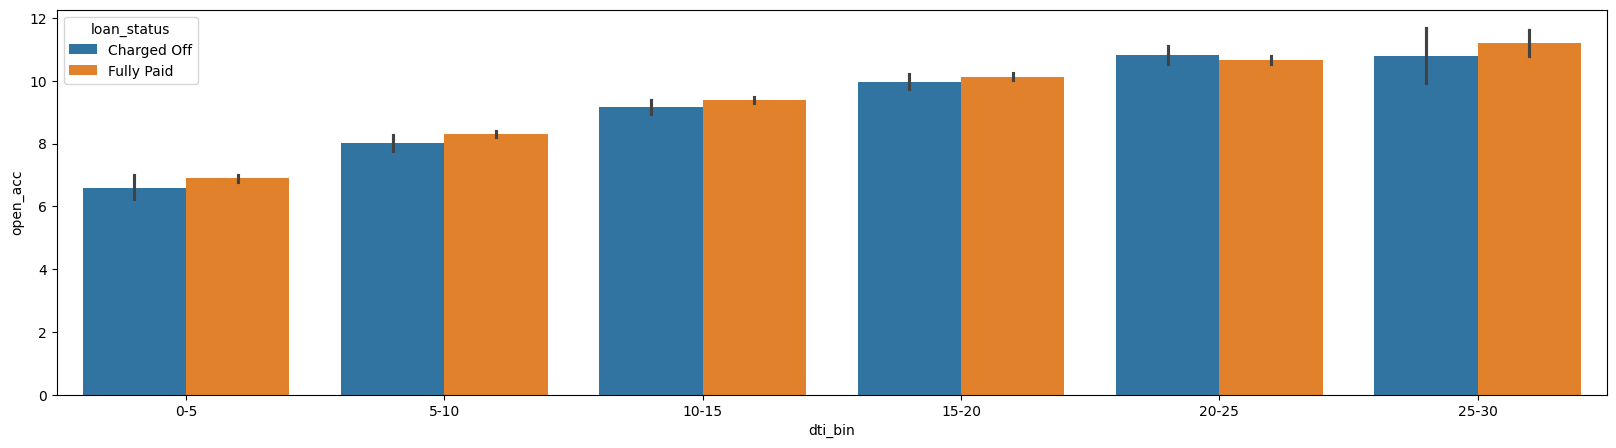

In [238]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=final_loan, estimator=np.mean)
plt.show()

**Observation** :

- The dti increses with the number of open credit line in borrowers credit file.

**delinq_2yr VS loan amount VS grade**

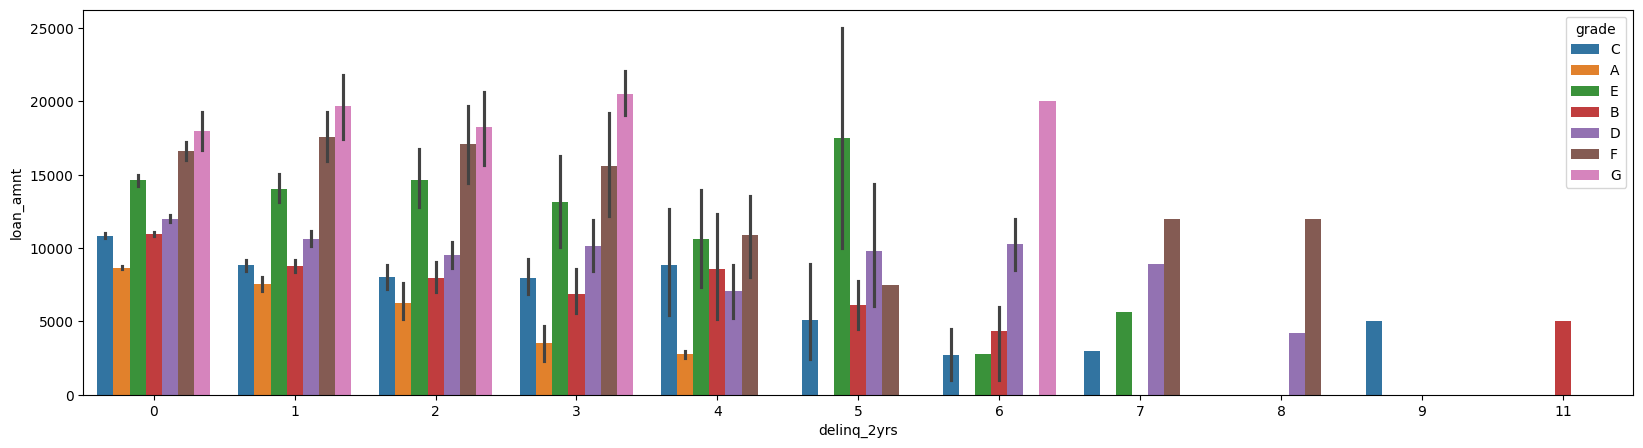

In [239]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=final_loan, estimator=np.mean)
plt.show()

**Observation** :

- Not many loans receive invstment with higher number of delinquencies(>3). Despite the low loan amount request, these loans are considered risky and are not invested much in.
- Lending club should further restrict their investment. We see loan amounts of >15000 on average for people having >=2 delinquencies.

**delinq_2yr VS int_rate VS loan_status**

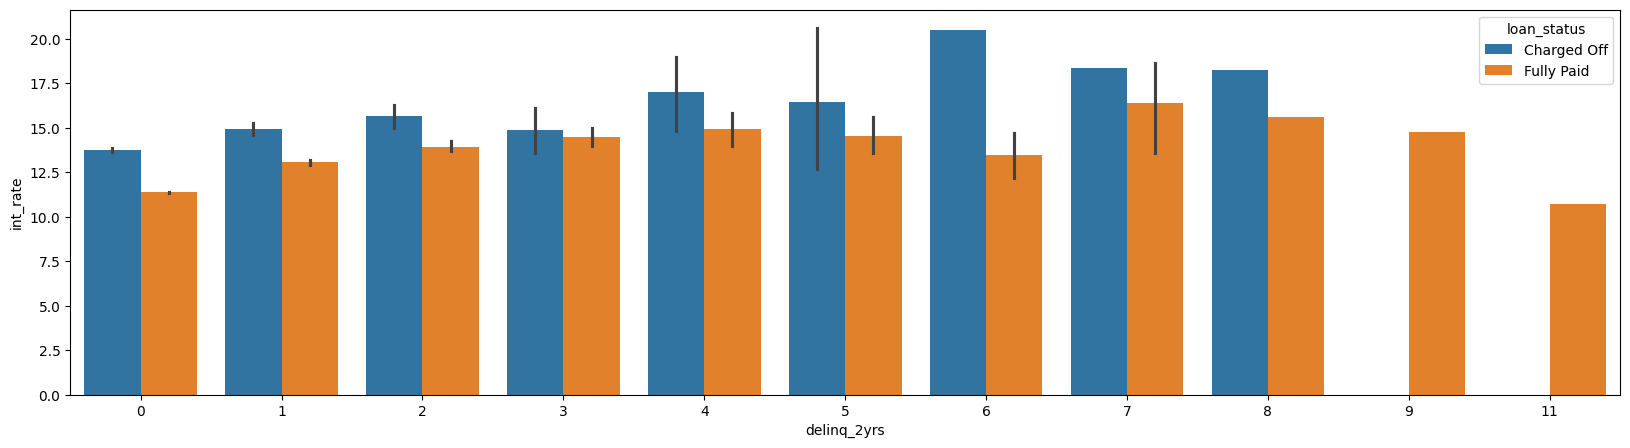

In [240]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=final_loan, estimator=np.mean)
plt.show()

**Observation** :

- In genral, intrest rate offered inceases with the number of deliquency of the borrower.

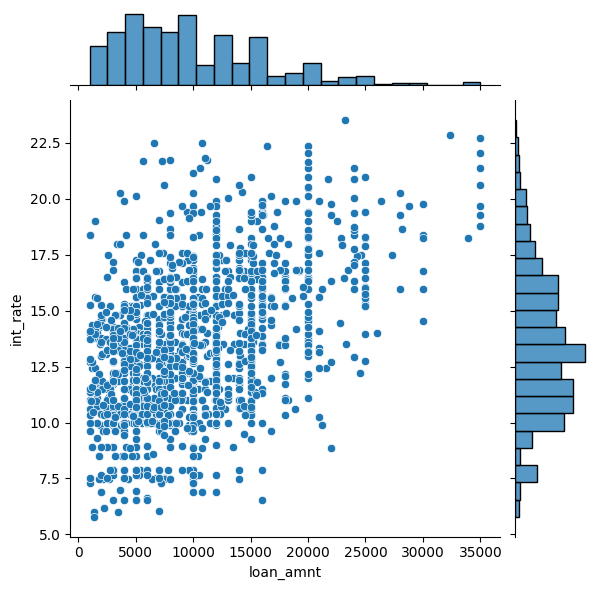

In [241]:
sns.jointplot(final_loan.loc[final_loan.pub_rec_bankruptcies > 0],x='loan_amnt', y='int_rate')

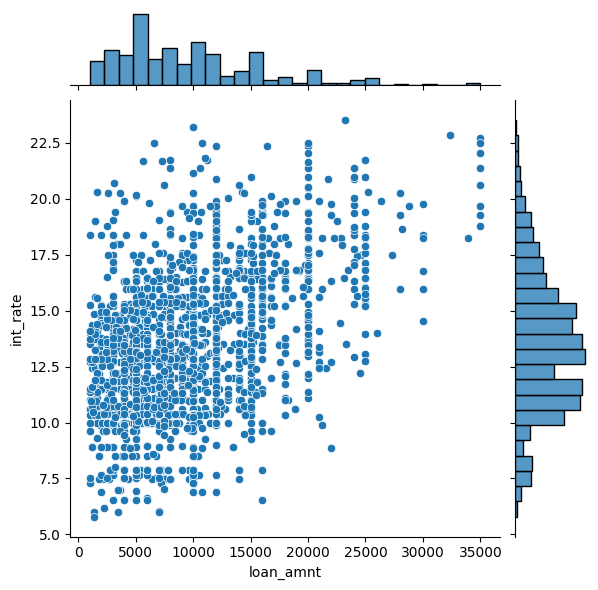

In [243]:
sns.jointplot(final_loan.loc[final_loan.pub_rec > 0],x='loan_amnt', y='int_rate')

In [244]:
final_loan[['pub_rec', 'pub_rec_bankruptcies']].corr()

pub_rec  pub_rec_bankruptcies
pub_rec               1.000000              0.839258
pub_rec_bankruptcies  0.839258              1.000000

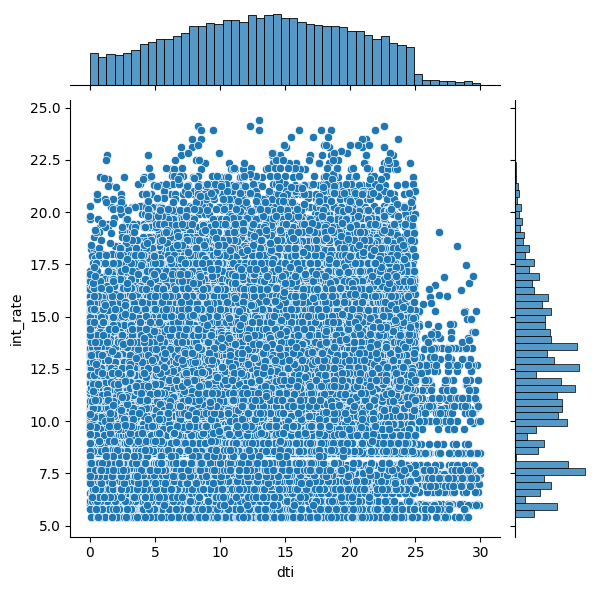

In [246]:
sns.jointplot(final_loan,x='dti', y='int_rate')

## Conclusion


1. **Risk Assessment for Grades B, C, and D**: Since loan applicants from Grades B, C, and D contribute to most of the "Charged Off" loans, Lending Club should consider implementing stricter risk assessment and underwriting criteria for applicants falling into these grades.

2. **Subgrades B3, B4, and B5**: Pay special attention to applicants with Subgrades B3, B4, and B5, as they are more likely to charge off. Implementing additional risk mitigation measures or offering them lower loan amounts could be considered.

3. **Term Length**: Given that applicants opting for 60-month loans are more likely to default, the company should consider evaluating the risk associated with longer-term loans and potentially limiting the maximum term or adjusting interest rates accordingly.

4. **Experience and Default Probability**: Loan applicants with ten or more years of experience are more likely to default. This suggests that experience alone may not be a reliable indicator of creditworthiness. The company should use a more comprehensive credit scoring system that factors in other risk-related attributes.

5. **Positive Growth Trend**: The steady increase in the number of loan applicants from 2007 to 2011 indicates growth in the market. The company can capitalize on this trend by maintaining a competitive edge in the industry while keeping risk management practices robust.

6. **Seasonal Trends**: December and Q4 are peak periods for loan applications, likely due to the holiday season. The company should anticipate increased demand during these periods and ensure efficient processing to meet customer needs.

7. **Debt Consolidation Risk**: Since debt consolidation is the category with the maximum number of loans and high default rates, the company should carefully evaluate applicants seeking debt consolidation loans and potentially adjust interest rates or offer financial counseling services.

8. **Housing Status and Default Risk**: Applicants living in rented or mortgaged houses are more likely to default. This information can be considered in the underwriting process to assess housing stability and its impact on repayment ability.

9. **Verification Process**: Verified loan applicants are defaulting more than those who are not verified. The company should review its verification process to ensure it effectively assesses applicant creditworthiness and consider improvements or adjustments.

10. **Geographic Risk**: Loan applicants from states like California (CA), Florida (FL), and New York (NY) are more likely to default. The company should monitor regional risk trends and adjust lending strategies or rates accordingly in these areas.

11. **High Loan Amounts**: Applicants receiving loan amounts of $15,000 or higher are more likely to default. The company can mitigate this risk by conducting more thorough assessments for larger loan requests and potentially capping loan amounts for higher-risk applicants.

12. **DTI and Interest Rates**: High Debt-to-Income (DTI) ratios and interest rates in the 13%-17% range are associated with defaults. The company should review its interest rate determination process and consider adjusting rates based on DTI ratios to better align with the borrower's ability to repay.

13. **Low Annual Income**: Applicants with annual incomes less than $40,000 have a higher likelihood of defaulting. The company should consider offering financial education resources or setting maximum loan amounts based on income levels to ensure affordability for borrowers.

